# Code Setup

In [1]:
GOOGLE_COLAB = False
%load_ext autoreload
%autoreload 2

In [2]:
if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')    

In [3]:
if GOOGLE_COLAB:
    #import necessary python files
    import sys
    import os
    
    drive_dir = '/content/drive/MyDrive/PouchPrint-IROS-2024'
    
    sys.path.append(os.path.join(drive_dir, 'python_READ_ONLY'))
    
    # specify where all data is stored
    data_folder = os.path.join(drive_dir, 'python_READ_ONLY', 'data-raw')
else:
    # specify where all data is stored
    data_folder = './data-raw'

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import utils_aruco
import utils_icp
import copy
from utils_data_process import *
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.image as mpimg
# from scipy.optimize import curve_fit

figures_dir = 'C:/Users/harry/Desktop/research_sync/IROS 2024/figures'
# plt.rcParams['mathtext.fontset'] = 'custom'

plt.rcParams['mathtext.default'] = 'regular'  # Use regular text for mathtext by default
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:bold'

# Optionally, you can also set the default font family to Arial for consistency
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
fontsize_main = 20
fontsize_legend = 14
# import sys
# import importlib
# importlib.reload(sys.modules['utils_data_process'])
import pandas as pd

# Exp 2-1 (90 deg bending characterization)

## Prep data

In [13]:
result_name = 'exp_2_1_20240519_21-17-07_onedir-diamond'

result_folder = os.path.join(data_folder, result_name)

values_dict, times_dict, camera_dict, camera_data_dict, camera_scale = default_data_prep(result_folder, ids=[0, 1])

16536
frame size (1080, 1920, 3)
saving to ./data-raw\exp_2_1_20240519_21-17-07_onedir-diamond\processed\load_data.pkl
Frame 1 saved as ./data-raw\exp_2_1_20240519_21-17-07_onedir-diamond\processed\frame_1.png
Frame 1000 saved as ./data-raw\exp_2_1_20240519_21-17-07_onedir-diamond\processed\frame_1000.png
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'camera_17', 'info_CYCLE_DONE', 'camera_42', 'camera_37']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])


## Figures
### Angle vs. time and Angle vs. pressure

[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 19 19 18 18 17 17 16
 16 15 15 14 14 13 13 12 12 11 11 10 10  9  9  8  8  7  7  6  6  5  5  4
  4  3  3  2  2  1  1  0  0]


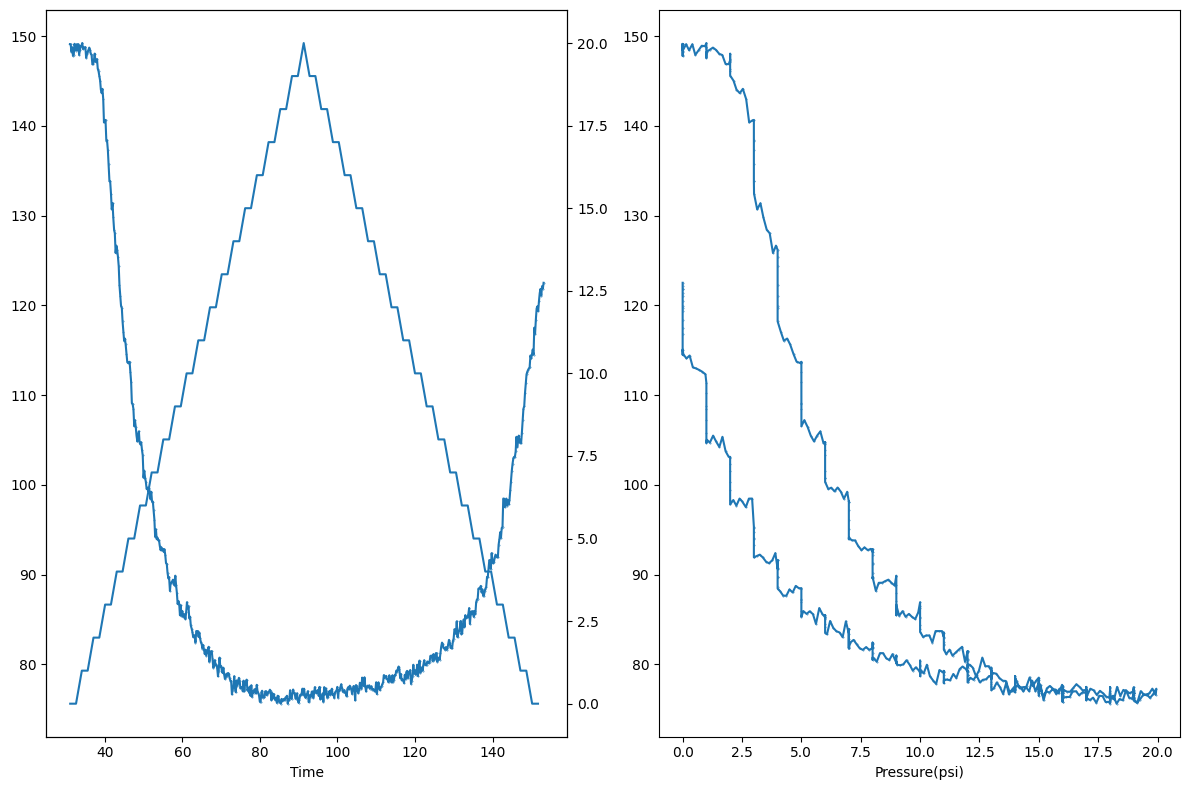

In [6]:
#interpolate regulator to match camera
r2_interp = np.interp(camera_data_dict['t'][1], times_dict['regulator_PWM2'], values_dict['regulator_PWM2'])
fig, axes = plt.subplots(1, 2, figsize=(12,8))

axes[0].scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
axes[0].plot(camera_data_dict['t'][1], camera_data_dict['rot'][1])
axes[0].set_xlabel('Time')
axes0_1 = axes[0].twinx()
axes0_1.plot(times_dict['regulator_PWM2'], values_dict['regulator_PWM2'])

axes[1].scatter(r2_interp, camera_data_dict['rot'][1], s=0.1)
axes[1].plot(r2_interp, camera_data_dict['rot'][1])
axes[1].set_xlabel('Pressure(psi)')
# plt.xlabel(x_label)
# plt.ylabel(y_label)
# plt.title(title)
# plt.grid(True)
plt.tight_layout()
print(values_dict['regulator_PWM2'])
# print(times_dict['regulator_PWM2'])


# def get_change_idx(arr):
#     indices = np.where(arr[:-1] != arr[1:])[0] 
#     indices = np.append(indices, arr.shape[0]-1)
#     # print(indices)
#     return indices

# def filter_PWM(value_arr, time_arr):
#     idx = get_change_idx(value_arr)
#     return value_arr[idx], time_arr[idx]

# #interpolate camera to match regulator
# value_PWM2, time_PWM2 = filter_PWM(values_dict['regulator_PWM2'], times_dict['regulator_PWM2'])
# camera_interp = np.interp(time_PWM2, camera_data_dict['t'][1], camera_data_dict['rot'][1])

# fig, axes = plt.subplots(1, 2, figsize=(8,4))
# # axes[0].scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1])
# # axes[0].set_xlabel('Time')
# axes[1].scatter(value_PWM2, camera_interp)
# axes[1].set_xlabel('Pressure(psi)')


### Displacement (in z) vs. time

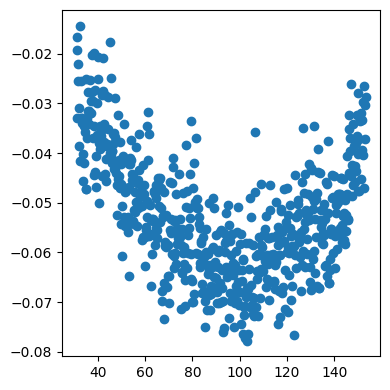

In [7]:
plt.figure(figsize=(4,4))
#plt.plot(x, y, marker='o', linestyle='-')
plt.scatter(camera_data_dict['t'][1], camera_data_dict['disp'][1][:, 2]*camera_scale)
plt.tight_layout()


### Displacement in X and Y, scatterplot

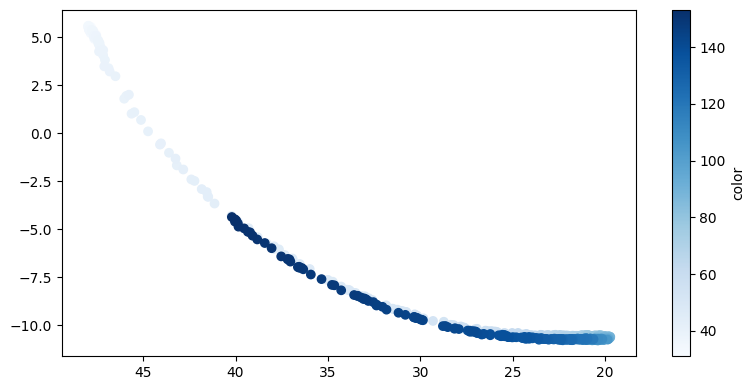

In [8]:
plt.figure(figsize=(8,4))
#plt.plot(x, y, marker='o', linestyle='-')
sc = plt.scatter(camera_data_dict['disp'][1][:, 0]*camera_scale, camera_data_dict['disp'][1][:, 1]*camera_scale, c=camera_data_dict['t'][1], cmap='Blues')
plt.gca().invert_xaxis()
# plt.xlabel(x_label)
# plt.ylabel(y_label)
plt.colorbar(sc, label = 'color')
# plt.title(title)
# plt.grid(True)
plt.tight_layout()


n cycle 1 cycle len 81


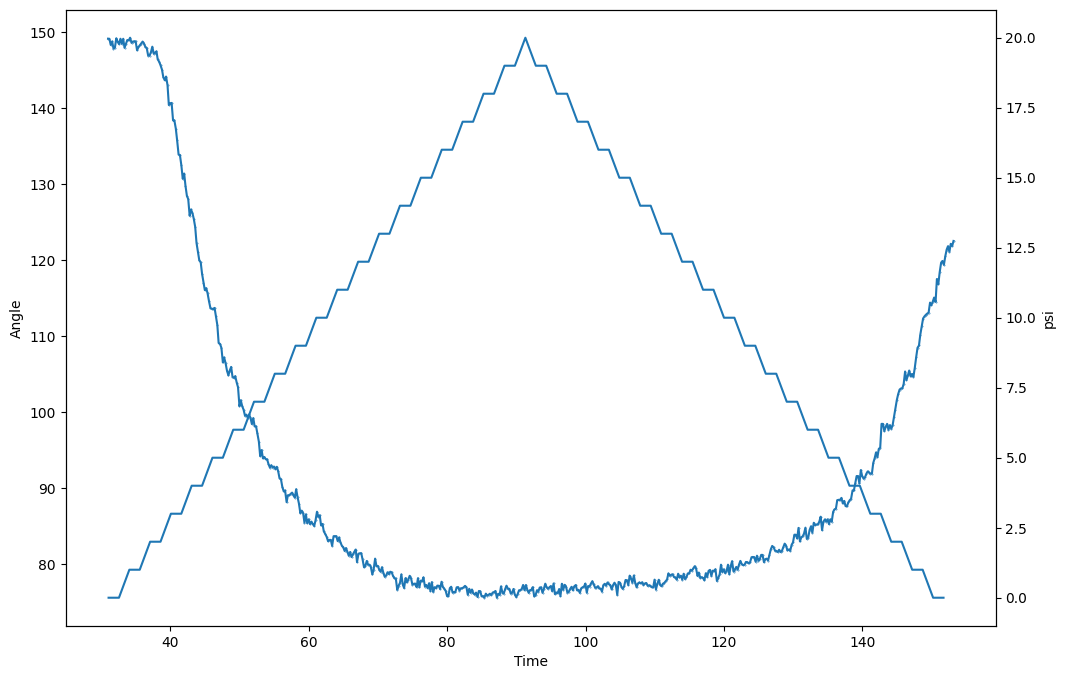

In [9]:
r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
r_time = times_dict['regulator_PWM2']
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
ax.plot(camera_data_dict['t'][1], camera_data_dict['rot'][1], linestyle='-')
ax.set_xlabel('Time')
ax.set_ylabel('Angle')
ax1 = ax.twinx()
ax1.plot(r_time, r_val)
ax1.set_ylabel('psi')

# reset_idx = np.where(r_val == r_val[0])[0]
# if reset_idx[1] + 1 == reset_idx[2]:
#     cycle_len = 
n_cycle = 1
cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)

# fig, ax = plt.subplots(1, 1, figsize=(6,6))

# for i in range(n_cycle):
#     # if i != 0:
#         # continue
#     start_idx = camera_data_dict['cycle_start_idx'][1][i]
#     end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
#     # print('end idx', end_idx)
#     # print('where', np.where(camera_data_dict['t_cycle'][1]> 500))
#     ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
#             camera_data_dict['rot'][1][start_idx:end_idx], 
#             linestyle='-',
#             label=f'Trial {i+1}'
#             )

# ax.legend()

fitted circle: x 22.23 y 17.73 r 28.45 sigma 0.09
circle error:  0.087145455


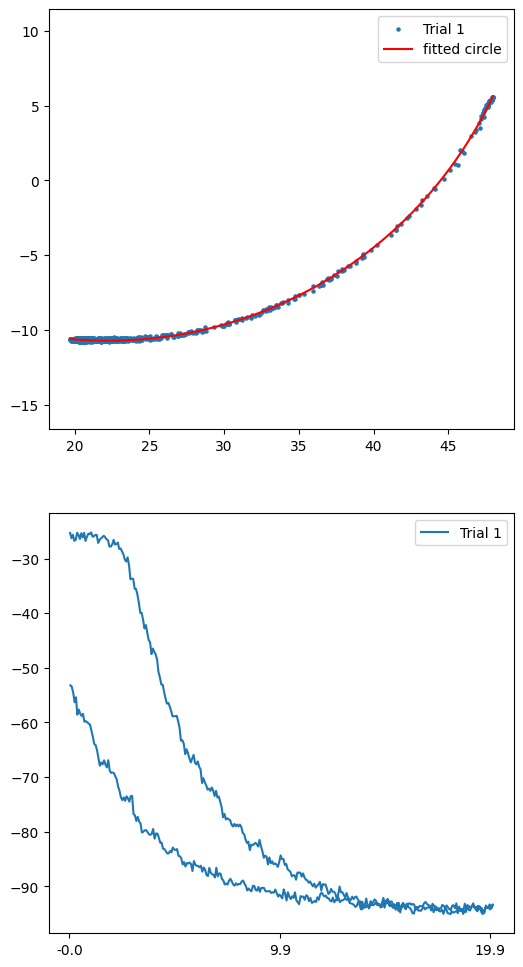

In [10]:


fig, axes = plt.subplots(2, 1, figsize=(6,12))
ax = axes[0]
for i in range(n_cycle):
    # if i != 0:
        # continue
    start_idx = camera_data_dict['cycle_start_idx'][1][i]
    end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
    ax.scatter(
        camera_data_dict['disp'][1][start_idx:end_idx, 0]*camera_scale[start_idx:end_idx], 
        camera_data_dict['disp'][1][start_idx:end_idx, 1]*camera_scale[start_idx:end_idx], 
        linestyle='-',
        label=f'Trial {i+1}',
        s=5
    )
ax.axis('equal')
xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp'][1][:, :2]*camera_scale[:, np.newaxis])
plot_circle_arc(ax, [xc, yc], r, np.min(angles), np.max(angles))
print('circle error: ', sigma)
ax.legend()

ax = axes[1]
for i in range(n_cycle):
    # if i != 0:
        # continue
    start_idx = camera_data_dict['cycle_start_idx'][1][i]
    end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
    ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
            np.rad2deg(angles)[start_idx:end_idx], 
            linestyle='-',
            label=f'Trial {i+1}'
            )

start_idx = camera_data_dict['cycle_start_idx'][1][0]
end_idx = camera_data_dict['cycle_start_idx'][1][1]

#remap time to pressure
custom_formatter = make_custom_formatter(
    np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]),
    np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx]),
    np.min(r_val[:cycle_len]),
    np.max(r_val[:cycle_len])
)
ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax.xaxis.set_major_locator(MultipleLocator(30))

ax.legend()

                                 


# *Exp 2-1-single

In [5]:

result_name_arr = [
    
    'exp_2_1_20240519_21-17-07_onedir-diamond',
]

tag_offset_dict = {
    1: {
        'rot': -180,
        'disp': [3.25,-3.25]
    }
}
ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, 
                                                                                                           result_name_arr, 
                                                                                                           ids,
                                                                                                           tag_offset_dict=tag_offset_dict)

found prior buffer, loading from ./data-raw\exp_2_1_20240519_21-17-07_onedir-diamond\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_2_1_20240519_21-17-07_onedir-diamond\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_2_1_20240519_21-17-07_onedir-diamond\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'camera_17', 'info_CYCLE_DONE', 'camera_42', 'camera_37']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])


-174.06583454045108
n cycle 10 cycle len 100
fitted circle: x 981.50 y 722.38 r 185.28 sigma 1.09
fitted circle: x -6.98 y 10.08 r 4.63 sigma 0.05
circle error 0.045569095379198815 0.045569095379198815
angles 77.2624597149737 169.07043780497023
752 range of angles 104.82033 -0.7471161 104.07321
max 104.07321
max 106.28424
max 106.93457
max 107.202194
max 107.57781
max 107.85343
max 108.12021
max 108.22676
max 108.498146
max 108.49341
start
range 54.647945 std 15.145503
mid
range 5.3226013 std 1.4888681
[102.25359  104.72289  105.63658  105.6394   106.82245  106.28424
 106.9329   107.576195 106.82329  107.204155]
end
range 4.4249344 std 1.2788643
traj
max range 54.018642 avg range 15.5895 range std 14.372435
-172.79862326159548
n cycle 10 cycle len 100
fitted circle: x 980.35 y 723.57 r 185.50 sigma 0.58
fitted circle: x -7.05 y 10.22 r 4.70 sigma 0.03
circle error 0.03262034328255176 0.03262034328255176
angles 75.54709641669805 167.2699772890072
754 range of angles 108.10301 0.11242676

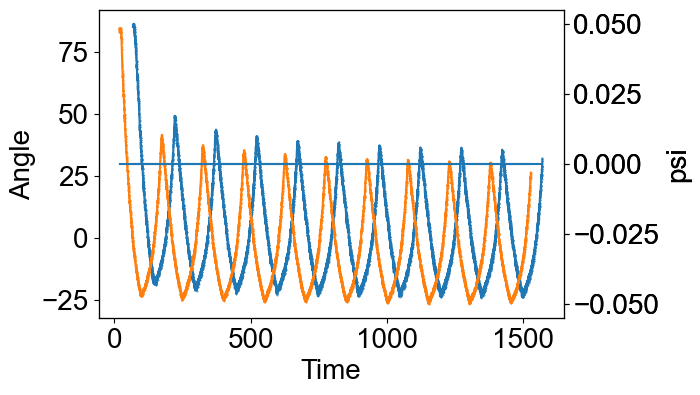

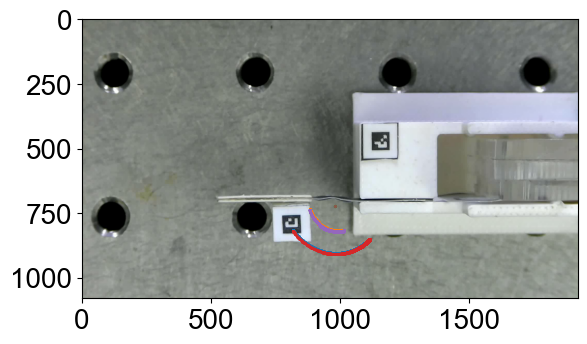

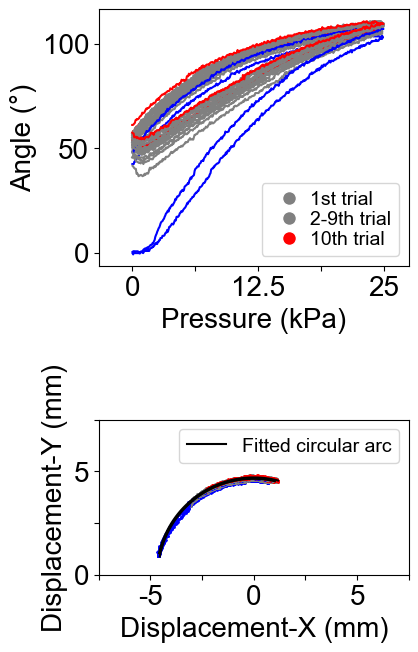

In [26]:
plt.rcParams['font.size'] = fontsize_main
n_cycle = 10
base_angle = 85.

lines = []
lines_circle = []
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_img = plt.subplots()
fig, ax_angle = plt.subplots(2, 1, figsize=(4,8), sharey='row',gridspec_kw={'wspace': 0.14, 'hspace': 0.4})

img = mpimg.imread(os.path.join(data_folder, result_name_arr[0], 'processed', 'frame_1.png'))
ax_img.imshow(img)

data_export = []

for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    
    print(calc_angle_wrt_horiz(camera_data_dict['corners'][1][0]))    
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    ax = ax_ori
    ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['rot'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')

    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_img
    ax.scatter(
            camera_data_dict['centroid'][1][:, 0], 
            camera_data_dict['centroid'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    ax.scatter(
            camera_data_dict['centroid_offset'][1][:, 0], 
            camera_data_dict['centroid_offset'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2])
    ax.scatter([xc], [yc], s=2)

    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0])
    circle_error = calc_circle_fit_err(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0], xc, yc, r)
    print('circle error', np.sqrt(np.mean(circle_error**2)), np.std(circle_error))
    
    # lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles)))
    # ax.scatter([xc]/camera_scale[0], [yc]/camera_scale[0], s=1, color='red')

    angles[angles < -1.5] += 2 * np.pi
    camera_data_dict['angle_wrt_fixed'][1][camera_data_dict['angle_wrt_fixed'][1] < -120] += 360

    print('angles', np.rad2deg(np.min(angles)), np.rad2deg(np.max(angles)))

    angle_plot_arr = []
    for i in range(n_cycle) :
    # for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-1:
            color = 'red'
        else:
            color = 'grey'
            
        ax = ax_angle[0]    
        # if i != 0:
            # continue
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        cur_t = camera_data_dict['t_cycle'][1][start_idx:end_idx]
        angle_plot = -1 * (camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle)
        angle_plot_arr.append(np.copy(angle_plot))
        if i == 0:
            print(len(angle_plot), 'range of angles', np.max(angle_plot) - np.min(angle_plot), np.min(angle_plot), np.max(angle_plot))
        # print(t_plot[-10:])
        line = ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
                angle_plot, 
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        
        cur_pressure = map_range(cur_t, np.min(cur_t), np.max(cur_t), 0, 172)
        data_export.append({'Pressure': cur_pressure, 'Angle': angle_plot})
        print('max', np.max(angle_plot))
        

        if ii == len(result_name_arr) - 1:
            lines.append(line)

        ax = ax_angle[1]
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        ax.scatter(
            (camera_data_dict['disp_offset'][1][start_idx:end_idx, 0]*camera_scale[0]-xc),#-base_disp[1], 
            camera_data_dict['disp_offset'][1][start_idx:end_idx, 1]*camera_scale[0]-yc,#-base_disp[0], 
            
            linestyle='-',
            label=f'Trial {i+1}',
            s=1,
            color=color
        )

    calc_angle_var(angle_plot_arr)
    lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles), flip_x=False))

for j in range(len(data_export)):
    df = pd.DataFrame(data_export[j])
    df.to_csv(f'data_export/diamond-angle/angle_{j}.csv', index=False)
        
    # ax.legend()
# print(lines)
for i, ax in enumerate([ax_angle[0]]):
    # ax.set_ylim(100,130)
    # ax.set_yticks([0, 25,50,75,100,125])
    # ax.set_yticklabels(['0', '', '50', '','100',''])
    ax.set_xlim(-10, np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])*1.1)
    #map tmime to pressure
    ax.set_xticks([map_range(tmp, -25, 25, 
                             np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]), 
                             np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])) for tmp in [-25, -12.5, 0, 12.5, 25]])
    ax.set_xticklabels(['0', '', '12.5', '', '25'])
    
    # ax.set_title(f'{psi[i]} kPa', fontsize='24')
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    if i == 0:
        ax.set_ylabel('Angle (°)', )
        ax.set_xlabel('Pressure (kPa)', )
    if i == 0:
        legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend
                          )

for i, ax in enumerate([ax_angle[1]]):
    # ax.axis('equal')
    ax.set_xlim(-7.5, 7.5)
    ax.set_xticks([-7.5,-5, -2.5, 0, 2.5, 5, 7.5])
    ax.set_xticklabels(['', '-5', '', '0', '', '5', '',])
    ax.set_ylim(0, 7.5)
    ax.set_yticks([0, 2.5, 5, 7.5])
    ax.set_yticklabels(['0', '', '5', '',])
    
    ax.set_aspect('equal')
    if i == 0:
        ax.set_ylabel('Displacement-Y (mm)')
    if i == 0:
        ax.legend(handles=[lines_circle[i][0]], labels=['Fitted circular arc'], fontsize=fontsize_legend,)
    if i == 0:
        ax.set_xlabel('Displacement-X (mm)')

# fig.text(0.06, 0.5, , va='center', rotation='vertical')
# plt.tight_layout()

plt.savefig(os.path.join(figures_dir, 'onedir-diamond-cont.pdf'), dpi=600,bbox_inches = 'tight')
plt.show()

# Exp-2-1-revision (check resetting)

In [50]:

result_name_arr = [
    
    'exp_2_1_20240919_13-08-22-reset-1',
    'exp_2_1_20240919_13-28-43_reset-2'
]

tag_offset_dict = {
    1: {
        'rot': -180,
        'disp': [3.25,-3.25]
    }
}
ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, 
                                                                                                           result_name_arr, 
                                                                                                           ids,
                                                                                                           tag_offset_dict=tag_offset_dict)

found prior buffer, loading from ./data-raw\exp_2_1_20240919_13-08-22-reset-1\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_2_1_20240919_13-08-22-reset-1\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_2_1_20240919_13-08-22-reset-1\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_0', 'camera_1', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'camera_17', 'info_CYCLE_DONE']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'angle_wrt_horiz', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])
found prior buffer, loading from ./data-raw\exp_2_1_20240919_13-28-43_reset-2\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_2_1_20240919_13-28-43_reset-2\

-174.06583454045108
n cycle 10 cycle len 100
fitted circle: x 981.50 y 722.38 r 185.28 sigma 1.09
fitted circle: x -6.98 y 10.08 r 4.63 sigma 0.05
circle error 0.045569095379198815 0.045569095379198815
angles 77.2624597149737 169.07043780497023
max 111.28424
max 111.93457
max 112.202194
max 112.57781
max 112.85343
max 113.12021
max 113.22676
max 113.498146
752 range of angles 104.82033 4.252884 109.07321
max 109.07321
max 113.49341
start
range 54.647945 std 15.145503
mid
range 5.336067 std 1.4002781
[110.63551  111.01584  111.28424  111.552826 111.555626 111.9329
 112.30666  112.202194 107.515396 112.85146 ]
end
range 4.4249344 std 1.2788641
traj
max range 54.018642 avg range 15.5895 range std 14.372435
-172.79862326159548
n cycle 10 cycle len 100
fitted circle: x 980.35 y 723.57 r 185.50 sigma 0.58
fitted circle: x -7.05 y 10.22 r 4.70 sigma 0.03
circle error 0.03262034328255176 0.03262034328255176
angles 75.54709641669805 167.2699772890072
max 114.5211
max 115.074875
max 115.074875
m

C:\Users\harry\AppData\Local\Temp\ipykernel_16464\1966156849.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


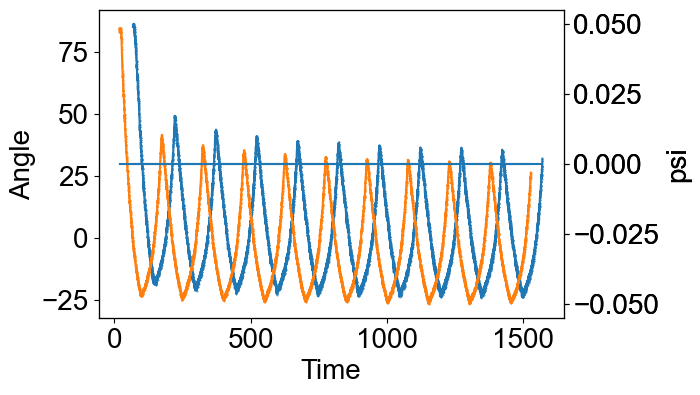

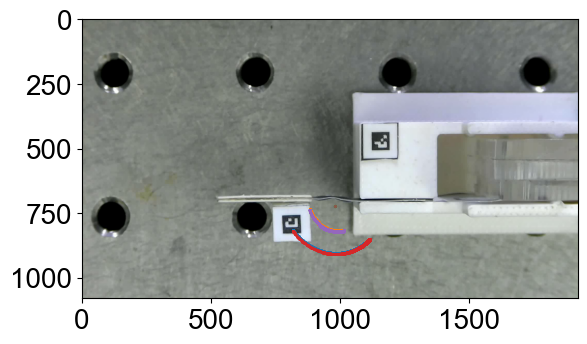

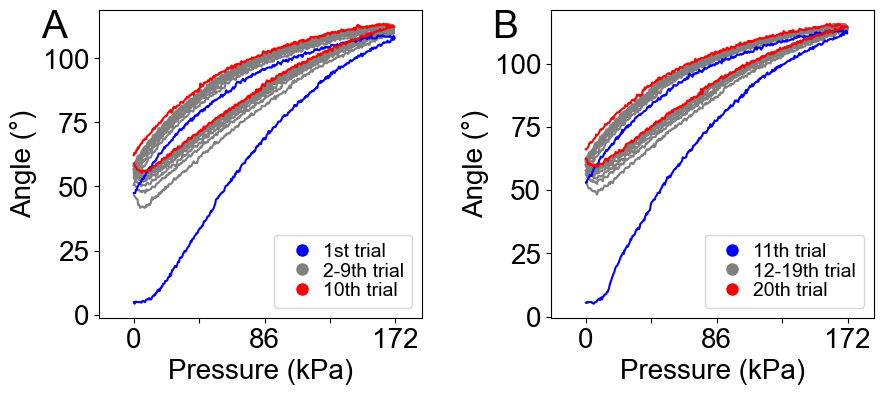

In [51]:
plt.rcParams['font.size'] = fontsize_main
n_cycle = 10
base_angle = 90.

lines = []
lines_circle = []
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_img = plt.subplots()
fig, ax_angle = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})

img = mpimg.imread(os.path.join(data_folder, result_name_arr[0], 'processed', 'frame_1.png'))
ax_img.imshow(img)

data_export = []

for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    
    print(calc_angle_wrt_horiz(camera_data_dict['corners'][1][0]))    
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    ax = ax_ori
    ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['rot'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')

    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_img
    ax.scatter(
            camera_data_dict['centroid'][1][:, 0], 
            camera_data_dict['centroid'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    ax.scatter(
            camera_data_dict['centroid_offset'][1][:, 0], 
            camera_data_dict['centroid_offset'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2])
    ax.scatter([xc], [yc], s=2)

    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0])
    circle_error = calc_circle_fit_err(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0], xc, yc, r)
    print('circle error', np.sqrt(np.mean(circle_error**2)), np.std(circle_error))
    
    # lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles)))
    # ax.scatter([xc]/camera_scale[0], [yc]/camera_scale[0], s=1, color='red')

    angles[angles < -1.5] += 2 * np.pi
    camera_data_dict['angle_wrt_fixed'][1][camera_data_dict['angle_wrt_fixed'][1] < -120] += 360

    print('angles', np.rad2deg(np.min(angles)), np.rad2deg(np.max(angles)))

    angle_plot_arr = []
    # for i in range(n_cycle) :
    for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-1:
            color = 'red'
        else:
            color = 'grey'
            
        ax = ax_angle[ii]    
        # if i != 0:
            # continue
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        cur_t = camera_data_dict['t_cycle'][1][start_idx:end_idx]
        angle_plot = -1 * (camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle)
        angle_plot_arr.append(np.copy(angle_plot))
        if i == 0:
            print(len(angle_plot), 'range of angles', np.max(angle_plot) - np.min(angle_plot), np.min(angle_plot), np.max(angle_plot))
        # print(t_plot[-10:])
        line = ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
                angle_plot, 
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        
        cur_pressure = map_range(cur_t, np.min(cur_t), np.max(cur_t), 0, 172)
        data_export.append({'Pressure': cur_pressure, 'Angle': angle_plot})
        print('max', np.max(angle_plot))
        

        if ii == len(result_name_arr) - 1:
            lines.append(line)

        # ax = ax_angle[1]
        # start_idx = camera_data_dict['cycle_start_idx'][1][i]
        # end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        # ax.scatter(
        #     (camera_data_dict['disp_offset'][1][start_idx:end_idx, 0]*camera_scale[0]-xc),#-base_disp[1], 
        #     camera_data_dict['disp_offset'][1][start_idx:end_idx, 1]*camera_scale[0]-yc,#-base_disp[0], 
            
        #     linestyle='-',
        #     label=f'Trial {i+1}',
        #     s=1,
        #     color=color
        # )

    calc_angle_var(angle_plot_arr)
    # lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles), flip_x=False))

    # ax.legend()
# print(lines)

ax_angle[0].text(-0.1, 1, 'A', transform=ax_angle[0].transAxes, fontsize=28, va='top', ha='right')
ax_angle[1].text(-0.1, 1, 'B', transform=ax_angle[1].transAxes, fontsize=28, va='top', ha='right')

for i, ax in enumerate(ax_angle):
    # ax.set_ylim(100,130)
    # ax.set_yticks([0, 25,50,75,100,125])
    # ax.set_yticklabels(['0', '', '50', '','100',''])
    ax.set_xlim(-10, np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])*1.1)
    #map tmime to pressure
    ax.set_xticks([map_range(tmp, -25, 25, 
                             np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]), 
                             np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])) for tmp in [-25, -12.5, 0, 12.5, 25]])
    ax.set_xticklabels(['0', '', '86', '', '172'])
    
    # ax.set_title(f'{psi[i]} kPa', fontsize='24')
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))

    ax.set_ylabel('Angle (°)', )
    ax.set_xlabel('Pressure (kPa)', )
    if i == 0:
        legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend
                          )
    if i == 1:
        legend_labels = [r'11th trial', r'12-19th trial', '20th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend
                          )

# for i, ax in enumerate([ax_angle[1]]):
#     # ax.axis('equal')
#     ax.set_xlim(-7.5, 7.5)
#     ax.set_xticks([-7.5,-5, -2.5, 0, 2.5, 5, 7.5])
#     ax.set_xticklabels(['', '-5', '', '0', '', '5', '',])
#     ax.set_ylim(0, 7.5)
#     ax.set_yticks([0, 2.5, 5, 7.5])
#     ax.set_yticklabels(['0', '', '5', '',])
    
#     ax.set_aspect('equal')
#     if i == 0:
#         ax.set_ylabel('Displacement-Y (mm)')
#     if i == 0:
#         ax.legend(handles=[lines_circle[i][0]], labels=['Fitted circular arc'], fontsize=fontsize_legend,)
#     if i == 0:
#         ax.set_xlabel('Displacement-X (mm)')

# fig.text(0.06, 0.5, , va='center', rotation='vertical')
plt.tight_layout()

plt.savefig(os.path.join(figures_dir, 'onedir-diamond-reset.pdf'), dpi=600, bbox_inches='tight')
plt.show()

# Exp 2-1-force (90 deg blocked force)
## Prep data

In [53]:
result_name = 'exp_2_1_force_20240323_17-47-08'

result_folder = os.path.join(data_folder, result_name)

values_dict, times_dict, camera_dict, camera_data_dict, camera_scale = default_data_prep(result_folder, ids=[0, 1])

found prior buffer, loading from ./data-raw\exp_2_1_force_20240323_17-47-08\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_2_1_force_20240323_17-47-08\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_2_1_force_20240323_17-47-08\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'force_sensor_force', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'camera_17', 'camera_37', 'info_CYCLE_DONE']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners'])


max 25.0
n cycle 10 cycle len 100


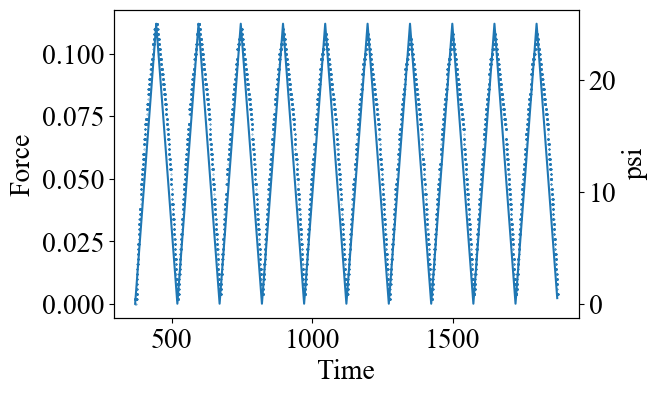

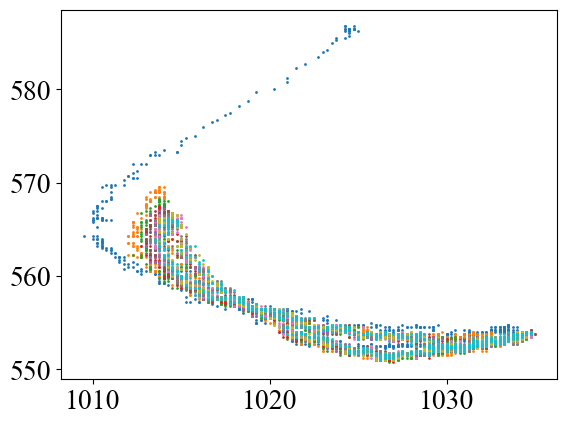

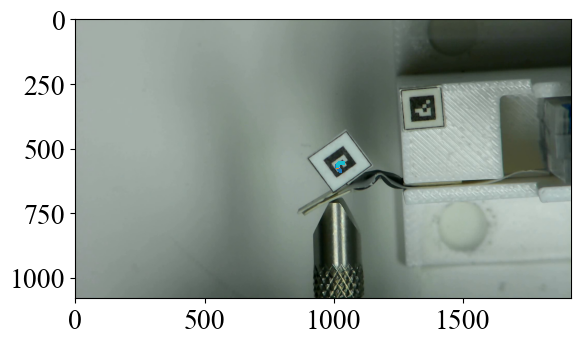

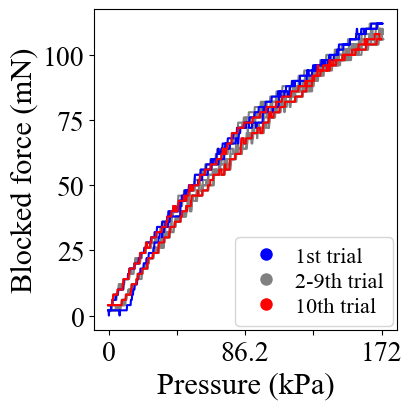

In [71]:
plt.rcParams['font.size'] = 20
r_val = values_dict['regulator_PWM2']
r_time = times_dict['regulator_PWM2']

n_cycle = 10

fig, ax = plt.subplots(1, 1, figsize=(6,4))
# ax.scatter(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], s=0.1)
# ax.plot(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], linestyle='-')
ax.scatter(times_dict['force_sensor_force'], values_dict['force_sensor_force'], s=0.1)
ax.set_xlabel('Time')
ax.set_ylabel('Force')
ax1 = ax.twinx()
ax1.plot(r_time, r_val)
print('max', np.max(r_val))
ax1.set_ylabel('psi')

cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
t_cycle_f, cycle_start_idx_f = calc_cycle(n_cycle, times_dict['force_sensor_force'], r_time) 

fig, ax = plt.subplots(1, 1)

img = mpimg.imread(os.path.join(result_folder, 'processed', 'frame_1000.png'))
fig, ax2 = plt.subplots()
ax2.imshow(img)

for i in range(n_cycle):
    # if i != 0:
        # continue
    start_idx = camera_data_dict['cycle_start_idx'][1][i]
    end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
    ax.scatter(
        camera_data_dict['centroid'][1][start_idx:end_idx, 0], 
        camera_data_dict['centroid'][1][start_idx:end_idx, 1], 
        linestyle='-',
        label=f'Trial {i+1}',
        s=1
    )
    ax2.scatter(
        camera_data_dict['centroid'][1][start_idx:end_idx, 0], 
        camera_data_dict['centroid'][1][start_idx:end_idx, 1], 
        linestyle='-',
        label=f'Trial {i+1}',
        s=1
    )
    
fig, ax_force = plt.subplots(1, 1, figsize=(4.5,4.5))

lines = []
for i in list(range(1, n_cycle-2))+[0, n_cycle-2] :
    start_idx = cycle_start_idx_f[i]
    end_idx = cycle_start_idx_f[i+1]

    cur_t = t_cycle_f[start_idx:end_idx] - t_cycle_f[start_idx]
    cur_f = values_dict['force_sensor_force'][start_idx:end_idx]
    
    ax = ax_force

    if i == 0:
        color = 'blue'
    elif i == n_cycle-2:
        color = 'red'
    else:
        color = 'grey'
    lines.append(ax.plot(cur_t, 
            cur_f*1000, 
            linestyle='-',
            label=f'{i+1}',
            color=color
        ))
   
    ax.set_xlabel('Pressure (kPa)')
    ax.set_ylabel('Blocked force (mN)')
    
    # ax.set_ylim(0, 140)
    # ax.set_yticks([0, 30, 60, 90,120])

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, 1, -1]]
ax_force.legend(handles=legend_handles, labels=['1st trial', '2-9th trial', '10th trial'], fontsize=fontsize_legend,, loc='lower right',
                  borderaxespad=0.2,
                  labelspacing=0.2,
                  handletextpad=0.3)

ax = ax_force
ax.set_xticks([map_range(tmp, 0, 25, 
                             np.min(t_cycle_f[start_idx:end_idx]), 
                             np.max(t_cycle_f[start_idx:end_idx])) for tmp in [0, 6.25, 12.5, 18.75, 25]])
ax.set_xticklabels(['0', '', '86.2', '', '172'])

plt.tight_layout()

plt.savefig(os.path.join(figures_dir, 'base-joint-cont-force.pdf'), dpi=600)
plt.show()

# Exp 2-3 (90 deg bending, binary actuation)
## Prep data

In [112]:
# result_name = 'exp_2_3_20240427_16-34-18_30s_30s' # 30sec deflate 30s inflate
# result_name = 'exp_2_3_20240427_14-19-57_30s_30s' # 30s deflate 30s inflate
# result_name = 'exp_2_3_20240427_18-40-38_120s_30s' # 120s deflate 30s inflate
# result_name = 'exp_2_3_20240427_19-17-16_120s_30s' # 120s defalte 30s inflate
result_name = 'exp_2_3_20240428_16-54-40_1200s_30s' # 10 trials
# result_name = 'exp_2_3_20240427_21-47-21_1200s_30s' # 5 trials
# result_name = 'exp_2_3_20240429_16-54-46_7200s_30s' # 7 trials
result_folder = os.path.join(data_folder, result_name)

values_dict, times_dict, camera_dict, camera_data_dict, camera_scale = default_data_prep(result_folder, ids=[0, 1])


found prior buffer, loading from ./data-raw\exp_2_3_20240428_16-54-40_1200s_30s\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_2_3_20240428_16-54-40_1200s_30s\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_2_3_20240428_16-54-40_1200s_30s\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'camera_17', 'camera_48', 'camera_37', 'info_CYCLE_DONE']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])


## Figures

max 0.0
n cycle 10 cycle len 2
fitted circle: x -5.35 y 10.51 r 8.42 sigma 0.01


IndexError: list index out of range

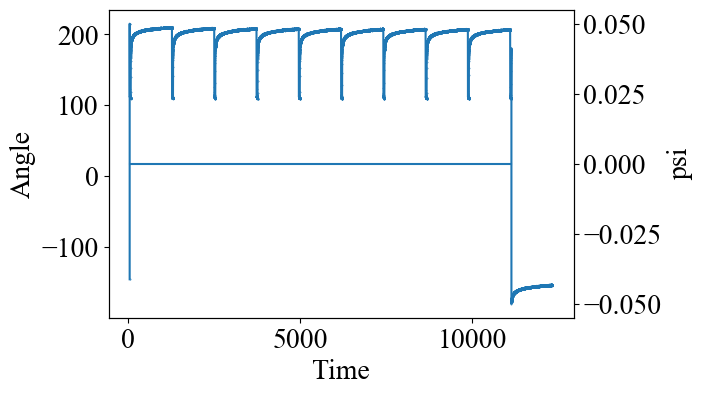

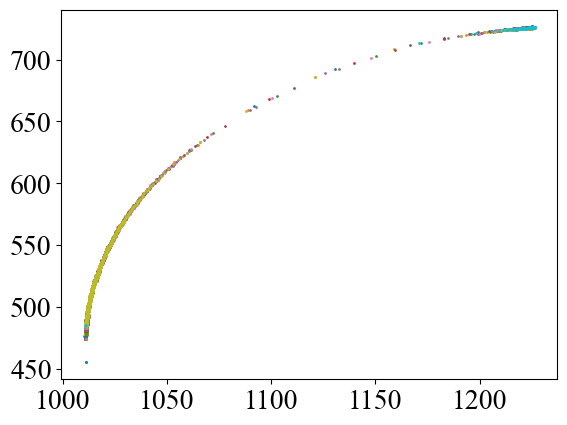

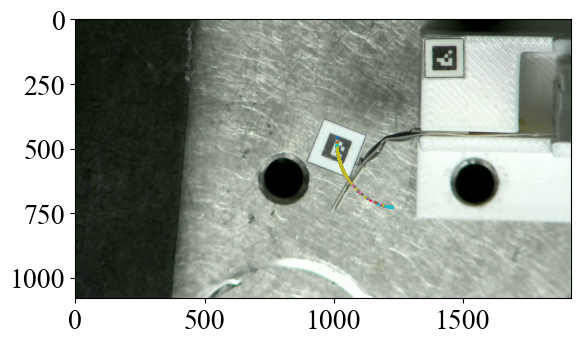

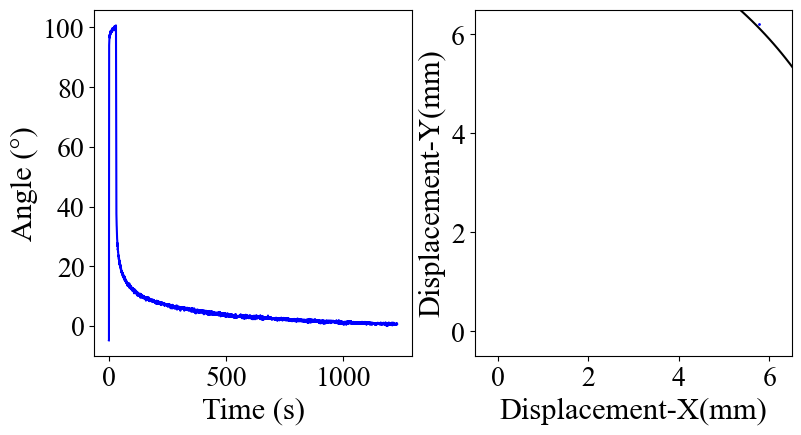

In [114]:
n_cycle = 10
plt.rcParams['font.size'] = 20
r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
r_time = times_dict['regulator_PWM2']

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], s=0.1)
ax.plot(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], linestyle='-')
ax.set_xlabel('Time')
ax.set_ylabel('Angle')
ax1 = ax.twinx()
ax1.plot(r_time, r_val)
print('max', np.max(r_val))
ax1.set_ylabel('psi')

cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)

fig, ax = plt.subplots(1, 1)

img = mpimg.imread(os.path.join(result_folder, 'processed', 'frame_1000.png'))
fig, ax2 = plt.subplots()
ax2.imshow(img)

for i in range(n_cycle):
    # if i != 0:
        # continue
    start_idx = camera_data_dict['cycle_start_idx'][1][i]
    end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
    ax.scatter(
        camera_data_dict['centroid'][1][start_idx:end_idx, 0], 
        camera_data_dict['centroid'][1][start_idx:end_idx, 1], 
        linestyle='-',
        label=f'Trial {i+1}',
        s=1
    )
    ax2.scatter(
        camera_data_dict['centroid'][1][start_idx:end_idx, 0], 
        camera_data_dict['centroid'][1][start_idx:end_idx, 1], 
        linestyle='-',
        label=f'Trial {i+1}',
        s=1
    )
    
fig, ax_angle = plt.subplots(1, 2, figsize=(9,4.5))

xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp'][1][:, :2]*camera_scale[0])

line_circle = plot_circle_arc(ax_angle[1], np.array([0, 0]), r, 0, np.deg2rad(90))
# ax1 = axes[1]
lines = []

t_arr = []
angle_arr = []
for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
    start_idx = camera_data_dict['cycle_start_idx'][1][i]
    end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

    cur_t = camera_data_dict['t'][1][start_idx:end_idx] -camera_data_dict['t'][1][start_idx]
    cur_angle = camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]
    cur_angle[cur_angle < 0] += 360
    cur_angle = -cur_angle+210
    
    # save data after 30 sec
    t_arr.append(cur_t[cur_t > 30].copy())
    angle_arr.append(cur_angle[cur_t > 30].copy())
    

    # cur_angle = -cur_angle
    ax = ax_angle[0]

    if i == 0:
        color = 'blue'
    elif i == n_cycle-1:
        color = 'red'
    else:
        color = 'grey'

    if i != 0:
        continue

    ax.plot(cur_t, 
            cur_angle, 
            linestyle='-',
            label=f'{i+1}',
            color=color
        )
   
    ax.set_xlabel('Time (s)', fontsize="22")
    ax.set_ylabel('Angle (°)', fontsize="22")
    # ax.set_xlim(30, 1300)
    # ax.set_ylim(-40, -30)
    # ax.set_yticks([0, 30, 60, 90,120])
    
    ax = ax_angle[1]
    # lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles)))
    # ax.scatter([xc]/camera_scale[0], [yc]/camera_scale[0], s=1, color='red')
    # print('shape', camera_data_dict['disp'][1][start_idx:end_idx, 0].shape)
    line = ax.scatter(
        -1*(camera_data_dict['disp'][1][start_idx:end_idx, 0]*camera_scale[0]-xc),#-base_disp[0], 
        camera_data_dict['disp'][1][start_idx:end_idx, 1]*camera_scale[0]-yc,#-base_disp[1], 
        linestyle='-',
        label=f'Trial {i+1}',
        s=1,
        color=color
    )
    lines.append(line)
    ax.set_xlabel('Displacement-X(mm)', fontsize="22")
    ax.set_ylabel('Displacement-Y(mm)', fontsize="22")
    ax.set_ylim(-0.5, 6.5)
    ax.set_yticks([0, 2, 4, 6])
    ax.set_xlim(-0.5, 6.5)
    ax.set_xticks([0, 2, 4, 6])


# save time and angle data for matlab
np.savetxt(os.path.join(result_folder, 'processed', 'mat_t.csv'), t_arr[0])
np.savetxt(os.path.join(result_folder, 'processed', 'mat_angle.csv'), angle_arr[0])

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i].get_facecolors(), markersize=10) for i in [-2, 1, -1]]
legend_handles.append(line_circle[0])
ax_angle[1].legend(handles=legend_handles, labels=['1st trial', '2-98th trial', '99th trial', 'fitted circle'], fontsize="16", loc='lower left',
                  borderaxespad=0.2,
                  labelspacing=0.2,
                  handletextpad=0.3)
ax_angle[1].axis('equal')

plt.tight_layout()

# plt.savefig(os.path.join(figures_dir, 'base-joint-binary.pdf'), dpi=600)
plt.show()

# *Exp 2-3 (20 min deflation data process)

[85.84017322 73.14646031 63.3063664  55.67380419 49.74898694 45.14529992
 41.56367362 38.77275984 36.59359683 34.88774678 33.54811958 32.49187434
 31.65492841 30.98770973 30.451871   30.017748   29.6623933  29.36805537
 29.12100197 28.91061004]
[0.000e+00 1.000e+00 2.000e+00 ... 5.995e+03 5.996e+03 5.997e+03]
mse 1 3.8396545038906322
mse 2 0.6190809212773943


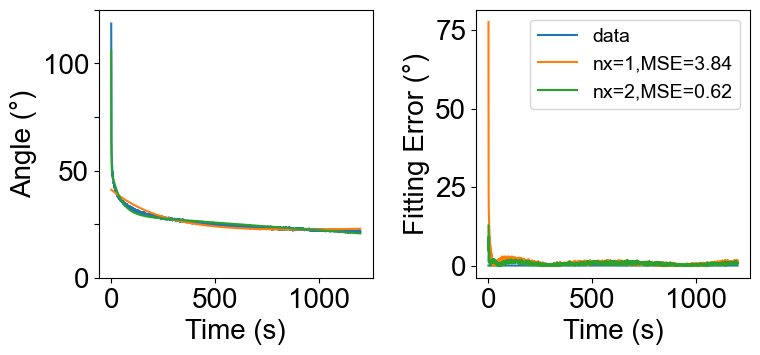

In [140]:
angle_offset = 20
plt.rcParams['font.size'] = fontsize_main
fig, ax_angle = plt.subplots(1, 2, figsize=(8,4))
result_name = 'exp_2_3_20240428_16-54-40_1200s_30s';
result_folder = os.path.join('./data-raw', result_name, 'processed')

input = np.loadtxt(os.path.join(result_folder, 'mat-input-nx1.csv'))
actual_output = np.loadtxt(os.path.join(result_folder, 'mat-actualOutput-nx1.csv'))
sim_output_1 = np.loadtxt(os.path.join(result_folder, 'mat-simOutput-nx1.csv'))
sim_output_2 = np.loadtxt(os.path.join(result_folder, 'mat-simOutput-nx2.csv'))

print(sim_output_2[:20])
print(input)
input *= 0.2

actual_output += angle_offset
sim_output_1 += angle_offset
sim_output_2 += angle_offset

ax = ax_angle[0]
ax.plot(input, actual_output)
ax.plot(input, sim_output_1)
ax.plot(input, sim_output_2)

print('mse 1', np.mean((sim_output_1-actual_output) ** 2))
print('mse 2', np.mean((sim_output_2-actual_output) ** 2))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (°)')
ax.set_yticks([0, 25,50,75,100,125])
ax.set_yticklabels(['0', '', '50', '','100',''])

ax = ax_angle[1]
ax.plot(input, np.zeros_like(input), label='data')
ax.plot(input, np.abs(sim_output_1-actual_output) , label='nx=1,MSE=3.84')
ax.plot(input, np.abs(sim_output_2-actual_output) , label='nx=2,MSE=0.62')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Fitting Error (°)')
ax.legend(fontsize=fontsize_legend)

plt.tight_layout()

plt.savefig(os.path.join(figures_dir, '20min-deflation.pdf'), dpi=600)
plt.show()

# *Exp 2-3-single

In [89]:
result_name_arr = [
    'exp_2_3_20240520_16-48-49_onedir-diamond'
    
]
tag_offset_dict = {
    1: {
        'rot': -180,
        'disp': [3.25,-3.25]
    }
}

n_cycle_arr = [10, 10]

ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, result_name_arr, ids,
                                                                                                          tag_offset_dict=tag_offset_dict)

found prior buffer, loading from ./data-raw\exp_2_3_20240520_16-48-49_onedir-diamond\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_2_3_20240520_16-48-49_onedir-diamond\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_2_3_20240520_16-48-49_onedir-diamond\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'info_CYCLE_DONE', 'camera_17']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])


fitted circle: x 1249.56 y 471.78 r 243.58 sigma 0.63
fitted circle: x -5.90 y 10.08 r 5.11 sigma 0.04
circle error 0.03611702234538487 0.03611702234538487
n cycle 10 cycle len 2
start
range 81.93553 std 34.490635
mid
range 15.947529 std 4.905225
[40.207306 47.219097 49.468758 52.28038  53.3999   54.065125 55.00083
 56.154835]
end
range 1.6618576 std 0.51479596
traj
max range 48.61782 avg range 8.488016 range std 7.1496105
new mid 15.236557


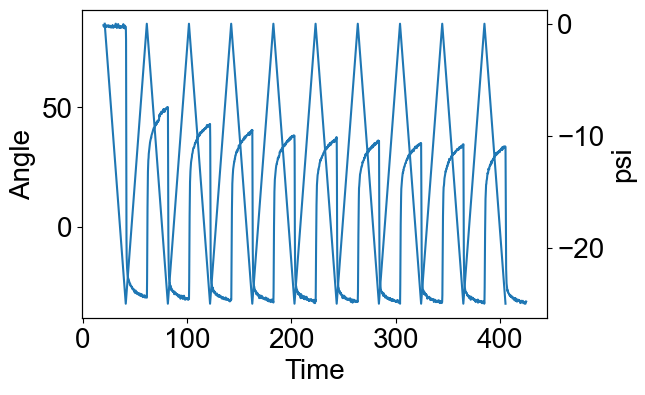

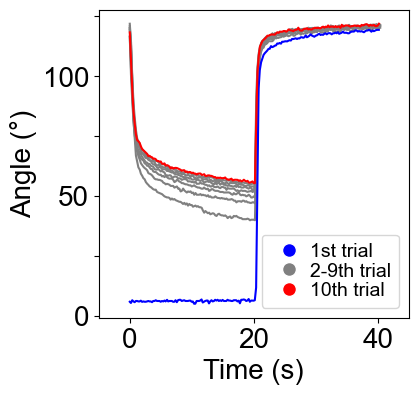

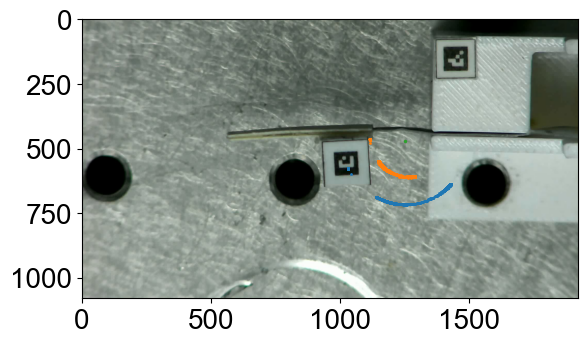

In [90]:
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_angle = plt.subplots(1, 1, figsize=(4,4), sharex=True, sharey=True, gridspec_kw={'wspace': 0.06})
lines = []
fig, ax_img = plt.subplots()
img = mpimg.imread(os.path.join(data_folder, result_name_arr[0], 'processed', 'frame_1.png'))
ax_img.imshow(img)

for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    n_cycle = n_cycle_arr[ii]
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']

    ax = ax_img
    ax.scatter(
            camera_data_dict['centroid'][1][:, 0], 
            camera_data_dict['centroid'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    ax.scatter(
            camera_data_dict['centroid_offset'][1][:, 0], 
            camera_data_dict['centroid_offset'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    
    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2])
    ax.scatter([xc], [yc], s=2)
    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0])
    circle_error = calc_circle_fit_err(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0], xc, yc, r)
    print('circle error', np.sqrt(np.mean(circle_error**2)), np.std(circle_error))
    ax = ax_ori
    # ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')
    
    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_angle
    # ax1 = axes[1]
    legend_labels = []
    camera_data_dict['angle_wrt_fixed'][1][camera_data_dict['angle_wrt_fixed'][1] < -120] += 360

    angle_plot_arr = []
    angle_mid_arr = []
    for i in list(range(1, n_cycle-2))+[0, n_cycle-2] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-2:
            color = 'red'
        else:
            color = 'grey'
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        
        # if i != 1:
        #     continue
        cur_t = camera_data_dict['t'][1][start_idx:end_idx] -camera_data_dict['t'][1][start_idx]
        cur_angle = camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]
        cur_angle = -cur_angle+90

        if i != 0:
            angle_plot_arr.append(np.copy(cur_angle))
            angle_mid_arr.append(cur_angle[np.argmin(np.abs(cur_t - 20))])
        lines.append(ax.plot(cur_t, 
                cur_angle, 
                linestyle='-',
                label=f'Trial {i+1}',
                color=color
                ))
        # ax1.scatter(i, camera_data_dict['rot'][1][(start_idx+end_idx)//2]-90)
        # if i == 1:
            # break
        # if i == n_cycle-2:
            # break
 
    calc_angle_var(angle_plot_arr)
    print('new mid', np.max(angle_mid_arr) - np.min(angle_mid_arr))
for i, ax in enumerate([ax_angle]):

    ax.set_yticks([0, 25,50,75,100,125])
    ax.set_yticklabels(['0', '', '50', '','100',''])
    ax.set_xlim(-5, 45)
    ax.set_xticks([0, 20, 40])
    
    # ax.set_title(subtitles[i], fontsize='24')
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    if i == 0:
        ax.set_ylabel('Angle (°)',)
        ax.set_xlabel('Time (s)')

    if i == 0:
        legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend
                          )
plt.savefig(os.path.join(figures_dir, 'onedir-diamond-step.pdf'), dpi=600, bbox_inches = 'tight')
plt.show()

# *Exp 3-1 (finger characterization)
 - keeping middle layer at 10psi, 90deg bending at 20 psi, -25psi to 25psi, repeat 4 times

## Prep data

In [45]:
# result_name = 'exp_3_1_20240222_15-53-23' # 4 trials
# result_name = 'exp_3_1_20240223_12-02-55_backbone_10' #10 trials
# result_name = 'exp_3_1_20240223_13-12-04_backbone_0' #10 trials
    # weird discontinuities -- tag lost track?
# result_name = 'exp_3_1_20240223_14-41-04_backbone_20' #10 trials 
    # only bends one way and gets stuck on the other
# result_name = 'exp_3_1_20240223_15-57-56_backbone_20'
    # bends both ways after bias by hand

#NEW DESIGN
# result_name = 'exp_3_1_20240226_18-26-05_backbone_0'
# result_name = 'exp_3_1_20240226_19-18-01_backbone_10'

# NEW DESIGN _> FINGER WITH FULL MIDDEL POUCH
# result_name ='exp_3_1_20240226_20-22-43_backbone_0_another'
# result_name = 'exp_3_1_20240226_21-26-02_backbone_10_another' #one side drifting
# result_name = 'exp_3_1_20240226_22-18-16_backbone_10_another' # try again 10 psi
# result_name = 'exp_3_1_20240226_23-18-30_backbone_20_another' #20psi

result_name_arr = [
    'exp_3_1_20240226_20-22-43_backbone_0_another',
    # 'exp_3_1_20240226_22-18-16_backbone_10_another',
    # 'exp_3_1_20240226_23-18-30_backbone_20_another'
]

tag_offset_dict = {
    2: {
        'rot': -90,
        'disp': [-2.5,-2.5]
    }
}

ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, result_name_arr, ids, tag_offset_dict=tag_offset_dict)

found prior buffer, loading from ./data-raw\exp_3_1_20240226_20-22-43_backbone_0_another\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_3_1_20240226_20-22-43_backbone_0_another\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_3_1_20240226_20-22-43_backbone_0_another\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_2', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'camera_17', 'camera_37', 'info_CYCLE_DONE', 'camera_34']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])


## Figures
### Pressure vs. xy position

n cycle 10 cycle len 200
fitted circle: x 649.76 y 595.30 r 202.30 sigma 9.92
fitted circle: x -38.30 y 16.79 r 5.04 sigma 0.29
angles 36.49205 -117.84273
angles 34.151054 -117.91696
angles 33.48436 -118.560074
angles 33.484924 -119.01893
angles 33.035797 -118.553856
angles 32.865494 -118.387985
angles 33.044525 -118.44135
angles 33.52571 -118.62738
1504 range of angles 155.54024 -116.88486 38.65538
angles 38.65538 -116.88486
angles 32.650696 -118.85596
start
range 13.41761 std 2.7690089
mid
range 5.295311 std 1.5621564
[34.220757 32.283028 31.657982 31.899254 32.066704 31.19712  31.437202
 32.16436  36.413956 31.118645]
end
range 6.0046844 std 1.8280857
traj
max range 18.335022 avg range 8.158131 range std 2.7569752
[[<matplotlib.lines.Line2D object at 0x000001F653838A90>], [<matplotlib.lines.Line2D object at 0x000001F65383A410>], [<matplotlib.lines.Line2D object at 0x000001F65383A380>], [<matplotlib.lines.Line2D object at 0x000001F65447A050>], [<matplotlib.lines.Line2D object at 0x00

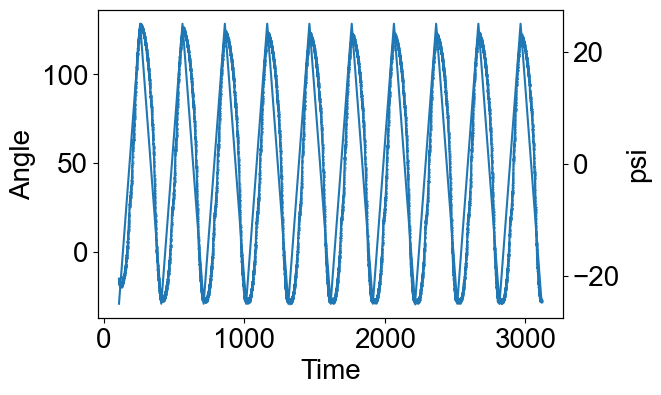

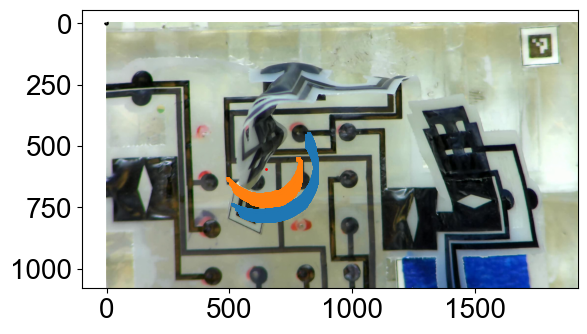

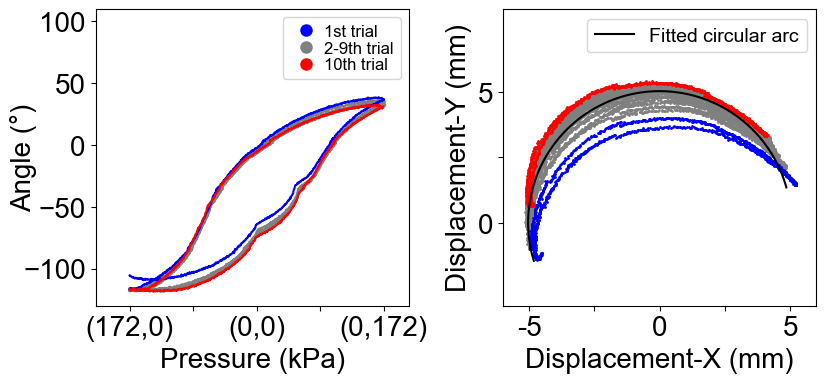

In [46]:
plt.rcParams['font.size'] = fontsize_main
n_cycle = 10
base_pos_pixel = np.array([144, 1088])*1.
tag_size = 5
base_angle = 90.
# base_disp = base_pos_pixel*camera_scale[0]+tag_size/2.

lines = []
lines_circle = []
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_img = plt.subplots()
fig, ax_angle = plt.subplots(1, 2, figsize=(9.3,3.85), gridspec_kw={'wspace': 0.3})

img = mpimg.imread(os.path.join(data_folder, result_name_arr[0], 'processed', 'frame_1000.png'))
ax_img.imshow(img)

for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    all_keys = ['t', 'rot', 'disp', 'centroid', 'angle_wrt_fixed', 'centroid_offset', 'disp_offset']
    for key in all_keys:
        if 2 in camera_data_dict[key]:
            camera_data_dict[key][1] = camera_data_dict[key][2]  
    
    
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    ax = ax_ori
    ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['rot'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')
 
    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_img
    ax.scatter(
            camera_data_dict['centroid'][1][:, 0], 
            camera_data_dict['centroid'][1][:, 1], 
            linestyle='-',
            s=1
        )
    ax.scatter(
            camera_data_dict['centroid_offset'][1][:, 0], 
            camera_data_dict['centroid_offset'][1][:, 1], 
            linestyle='-',
            s=1
    )
    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2])
    ax.scatter([xc], [yc], s=1, color='red')

    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0])
    lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles)))
    # ax.scatter([xc]/camera_scale[0], [yc]/camera_scale[0], s=1, color='red')


    angle_plot_arr = []
    for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-1:
            color = 'red'
        else:
            color = 'grey'
            
        ax = ax_angle[0]    
        # if i != 0:
            # continue
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        angle_plot = camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle
        angle_plot_arr.append(np.copy(angle_plot))
        if i == 0:
            print(len(angle_plot), 'range of angles', np.max(angle_plot) - np.min(angle_plot), np.min(angle_plot), np.max(angle_plot))
        line = ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
               angle_plot, 
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        print('angles', np.max(camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle), 
              np.min(camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle))
        if ii == len(result_name_arr) - 1:
            lines.append(line)

    #remap time to pressure
    # custom_formatter = make_custom_formatter(
    #     np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]),
    #     np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx]),
    #     np.min(r_val[:cycle_len]),
    #     np.max(r_val[:cycle_len]),
    #     display_int=False
    # )
    # ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
    # ax.xaxis.set_major_locator(MultipleLocator(30))
        ax = ax_angle[1]
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        ax.scatter(
            -1 * (camera_data_dict['disp_offset'][1][start_idx:end_idx, 0]*camera_scale[0]-xc),#-base_disp[0], 
            camera_data_dict['disp_offset'][1][start_idx:end_idx, 1]*camera_scale[0]-yc,#-base_disp[1], 
            linestyle='-',
            label=f'Trial {i+1}',
            s=1,
            color=color
        )
    lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles),flip_x=True))
    calc_angle_var(angle_plot_arr)

    # ax.legend()
print(lines)
psi = [0, 68.9, 137.8]
for i, ax in enumerate([ax_angle[0]]):
    # ax.set_ylim(-130, 50)
    ax.set_ylim(-130, 110)
    ax.set_yticks([-100, -50, 0, 50,100])
    # ax.set_yticks([-100, -50, 0, 50])
    ax.set_xlim(-20, np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])*1.1)
    #map tmime to pressure
    ax.set_xticks([map_range(tmp, -25, 25, 
                             np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]), 
                             np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])) for tmp in [-25, -12.5, 0, 12.5, 25]])

    ax.set_xticklabels(['(172,0)', '', '(0,0)', '', '(0,172)'])
    
    # ax.set_title(f'{psi[i]} kPa', fontsize='24')
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    if i == 0:
        ax.set_ylabel('Angle (°)', labelpad=-10)
    if i == 0:
        ax.set_xlabel('Pressure (kPa)', )
    if i == 0:
        legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='upper right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend-2,
                          )

for i, ax in enumerate([ax_angle[1]]):
    ax.axis('equal')
    ax.set_xlim(-6, 6)
    ax.set_xticks([-5, -2.5, 0, 2.5, 5])
    ax.set_xticklabels(['-5', '', '0', '', '5'])
    ax.set_ylim(-3.5, 8.5)
    ax.set_yticks([0, 2.5, 5])
    ax.set_yticklabels(['0', '', '5',])
    
    if i == 0:
        ax.set_ylabel('Displacement-Y (mm)', )
    if i == 0:
        ax.legend(handles=[lines_circle[i][0]], labels=['Fitted circular arc'], fontsize=fontsize_legend,)
    if i == 0:
        ax.set_xlabel('Displacement-X (mm)', )

# fig.text(0.06, 0.5, , va='center', rotation='vertical')
# plt.tight_layout()

plt.savefig(os.path.join(figures_dir, 'bidir-continuous-angle.pdf'), dpi=600, bbox_inches = 'tight')
plt.show()

## test

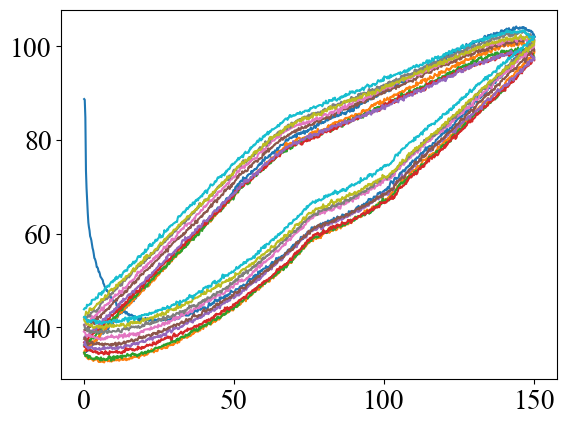

In [296]:
# fig, ax = plt.subplots(1, 1)

# img = mpimg.imread(os.path.join(result_folder, 'processed', 'frame_1000.png'))
# fig, ax2 = plt.subplots()
# ax2.imshow(img)
# for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
#     cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
#     for i in range(n_cycle):
#         # if i != 0:
#             # continue
#         start_idx = camera_data_dict['cycle_start_idx'][1][i]
#         end_idx = camera_data_dict['cycle_start_idx'][1][i+1]    
#         ax2.scatter(
#             camera_data_dict['centroid'][1][start_idx:end_idx, 0], 
#             camera_data_dict['centroid'][1][start_idx:end_idx, 1], 
#             linestyle='-',
#             label=f'Trial {i+1}',
#             s=1
#         )
 
#     xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2]*camera_scale[0])
#     ax2.scatter([xc]/camera_scale[0], [yc]/camera_scale[0], s=1, color='red')
#     print('circle error: ', sigma)
# ax.axis('equal')
    # ax.set_xlim(0, 1080) 
    # ax.set_ylim(0, 1920) 
    # ax.set_aspect(1080/1920)
    # ax.invert_yaxis()
    
# ax.legend()

# angle plot
fig, ax = plt.subplots(1, 1)
for i in range(n_cycle):
    # if i != 0:
        # continue
    start_idx = camera_data_dict['cycle_start_idx'][1][i]
    end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
    ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
            np.rad2deg(angles)[start_idx:end_idx], 
            linestyle='-',
            label=f'Trial {i+1}'
            )

# start_idx = camera_data_dict['cycle_start_idx'][1][0]
# end_idx = camera_data_dict['cycle_start_idx'][1][1]

# #remap time to pressure
# custom_formatter = make_custom_formatter(
#     np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]),
#     np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx]),
#     np.min(r_val[:cycle_len]),
#     np.max(r_val[:cycle_len])
# )
# ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
# ax.xaxis.set_major_locator(MultipleLocator(30))

# ax.legend()

                                 

# *Exp 3-1-single 

In [21]:

result_name_arr = [
    # 'exp_3_1_single_20240325_09-37-24_single_backbone_0',
    # 'exp_3_1_single_20240325_10-34-13_single_backbone_10',
    # 'exp_3_1_single_20240325_12-57-31_single_backbone_10',
    # 'exp_3_1_single_20240325_13-52-29_single_backbone_20'
    # 'exp_3_1_single_20240325_14-54-47_single_backbone_20' # another run with different initial conditions
    # 'exp_3_1_single_20240325_11-53-28_single_backbone_20'

    # 'exp_3_1_single_20240519_14-10-41_bidir-single' # new design of actuators
    'exp_3_1_single_20240519_20-10-24_bidir-single',
    'exp_3_1_single_20240519_15-25-01_bidir-twopouch'
]

tag_offset_dict = {
    1: {
        'rot': -180,
        'disp': [3.25,-3.25]
    }
}
ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, 
                                                                                                           result_name_arr, 
                                                                                                           ids,
                                                                                                           tag_offset_dict=tag_offset_dict)

found prior buffer, loading from ./data-raw\exp_3_1_single_20240519_20-10-24_bidir-single\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_3_1_single_20240519_20-10-24_bidir-single\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_3_1_single_20240519_20-10-24_bidir-single\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'camera_17', 'info_CYCLE_DONE']


KeyboardInterrupt: 

-131.53874612204586
n cycle 10 cycle len 200
fitted circle: x 1325.10 y 431.30 r 241.67 sigma 0.73
fitted circle: x -3.71 y 9.77 r 3.97 sigma 0.03
circle error 0.025385790209430315 0.025385790209430315
1704 range of angles 114.50646 -49.16433 65.34213
start
range 6.482647 std 1.5764145
mid
range 2.6278687 std 0.82485616
[63.739365 63.23056  61.936172 62.721344 62.50592  61.995895 62.503143
 61.776566 64.17908  61.55121 ]
end
range 2.3952026 std 0.70768553
traj
max range 17.601631 avg range 2.8325663 range std 2.4861295
-63.86358755562412
n cycle 10 cycle len 200
fitted circle: x 1265.18 y 410.34 r 241.63 sigma 8.50
fitted circle: x -4.81 y 8.78 r 4.61 sigma 0.11
circle error 0.11124195689169226 0.11124195689169226
1751 range of angles 217.26448 -117.37251 99.89197
start
range 7.5106583 std 1.8362472
mid
range 1.5129395 std 0.46585196
[99.060776 98.551254 98.40489  99.24425  98.73808  98.55507  98.09131
 98.09004  97.73131  97.91461 ]
end
range 1.7943573 std 0.602312
traj
max range 34.3

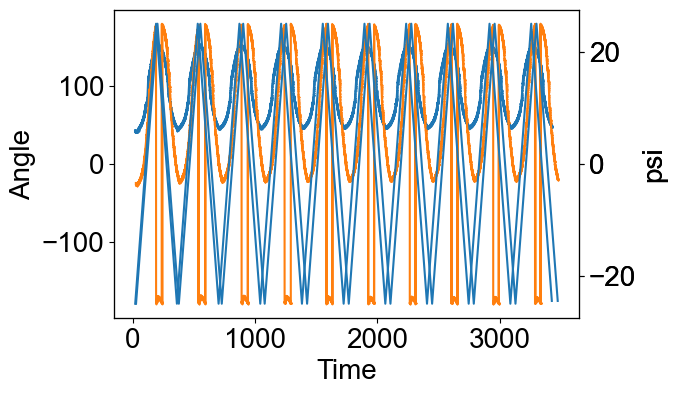

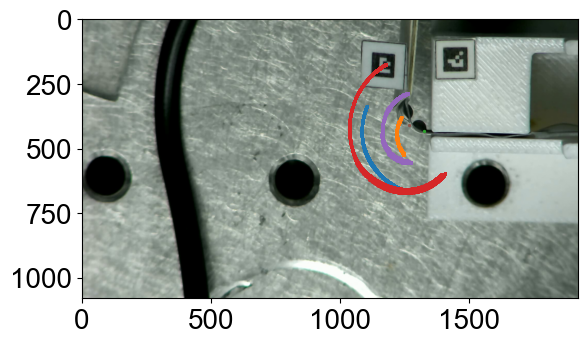

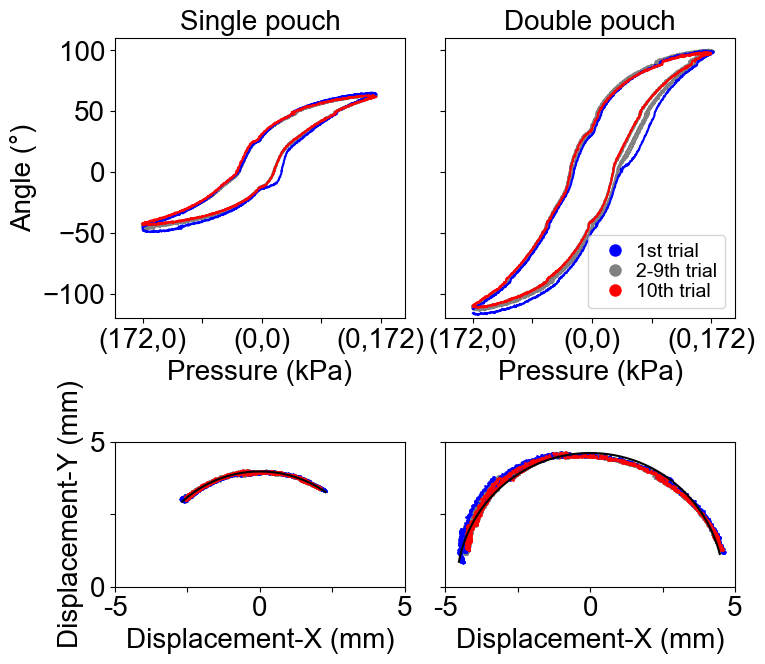

In [111]:
plt.rcParams['font.size'] = fontsize_main
n_cycle = 10
base_angle = 90.

lines = []
lines_circle = []
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_img = plt.subplots()
fig, ax_angle = plt.subplots(2, 2, figsize=(8,8), sharey='row',gridspec_kw={'wspace': 0.14, 'hspace': 0.2})

img = mpimg.imread(os.path.join(data_folder, result_name_arr[1], 'processed', 'frame_1000.png'))
ax_img.imshow(img)

for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    # all_keys = ['t', 'rot', 'disp', 'centroid', 'angle_wrt_fixed']
    # for key in all_keys:
    #     if 2 in camera_data_dict[key]:
    #         camera_data_dict[key][1] = camera_data_dict[key][2]  
    
    print(calc_angle_wrt_horiz(camera_data_dict['corners'][1][0]))    
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    ax = ax_ori
    ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['rot'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')

    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_img
    ax.scatter(
            camera_data_dict['centroid'][1][:, 0], 
            camera_data_dict['centroid'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    ax.scatter(
            camera_data_dict['centroid_offset'][1][:, 0], 
            camera_data_dict['centroid_offset'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2])
    ax.scatter([xc], [yc], s=2)

    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0])
    circle_error = calc_circle_fit_err(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0], xc, yc, r)
    print('circle error', np.sqrt(np.mean(circle_error**2)), np.std(circle_error))
    # lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles)))
    # ax.scatter([xc]/camera_scale[0], [yc]/camera_scale[0], s=1, color='red')

    angles[angles < -1.5] += 2 * np.pi
    camera_data_dict['angle_wrt_fixed'][1][camera_data_dict['angle_wrt_fixed'][1] < -120] += 360
    # print('angles', np.min(angles), np.max(angles))

    angle_plot_arr = []
    for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-1:
            color = 'red'
        else:
            color = 'grey'
            
        ax = ax_angle[0][ii]    
        # if i != 0:
            # continue
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        # print('angles', np.min( camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle), 
              # np.max( camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle, ))
        angle_plot = camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle
        if i == 0:
            print(len(angle_plot), 'range of angles', np.max(angle_plot) - np.min(angle_plot), np.min(angle_plot), np.max(angle_plot))
        angle_plot_arr.append(angle_plot)
        line = ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
               angle_plot, 
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        
        if ii == len(result_name_arr) - 1:
            lines.append(line)

        ax = ax_angle[1][ii]
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        ax.scatter(
            -1 * (camera_data_dict['disp_offset'][1][start_idx:end_idx, 1]*camera_scale[0]-yc),#-base_disp[0], 
            -1*(camera_data_dict['disp_offset'][1][start_idx:end_idx, 0]*camera_scale[0]-xc),#-base_disp[1], 
            linestyle='-',
            label=f'Trial {i+1}',
            s=1,
            color=color
        )
    calc_angle_var(angle_plot_arr)
    lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles), flip_xy=True, flip_x=True))


    # ax.legend()
print(lines)
subtitle = ['Single pouch', 'Double pouch']
for i, ax in enumerate(ax_angle[0]):
    ax.set_ylim(-120, 110)
    ax.set_yticks([-100, -50, 0, 50,100])
    ax.set_xlim(-20, np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])*1.1)

    #map tmime to pressure
    ax.set_xticks([map_range(tmp, -25, 25, 
                             np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]), 
                             np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])) for tmp in [-25, -12.5, 0, 12.5, 25]])
    ax.set_xticklabels(['(172,0)', '', '(0,0)', '', '(0,172)'])
    
    ax.set_title(subtitle[i], fontsize=fontsize_main)
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    if i == 0:
        ax.set_ylabel('Angle (°)', )
  
    ax.set_xlabel('Pressure (kPa)', )
    if i == 1:
        legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend
                          )

    # if i == 2:
    #     legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
    #     legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
    #     legend = ax.legend(legend_handles, legend_labels, ncol=1, 
    #                        labelspacing=0.1, 
    #                        columnspacing =0.05,
    #                        loc='upper right', 
    #                        handletextpad=0.1, 
    #                        fontsize=fontsize_legend,
    #                       )

for i, ax in enumerate(ax_angle[1]):
    # ax.axis('equal')
    ax.set_xlim(-5, 5)
    ax.set_xticks([-5, -2.5, 0, 2.5, 5])
    ax.set_xticklabels(['-5', '', '0', '', '5'])
    ax.set_ylim(0, 5)
    ax.set_yticks([0, 2.5, 5])
    ax.set_yticklabels(['0', '', '5',])
    
    ax.set_aspect('equal')
    if i == 0:
        ax.set_ylabel('Displacement-Y (mm)', )
    if i == 2:
        ax.legend(handles=[lines_circle[i][0]], labels=['Fitted circular arc'], fontsize=fontsize_legend,)
   
    ax.set_xlabel('Displacement-X (mm)', )

# fig.text(0.06, 0.5, , va='center', rotation='vertical')
# plt.tight_layout()

plt.savefig(os.path.join(figures_dir, 'bidir-single-cont.pdf'), dpi=600)
plt.show()

# Exp 3-1-force (single actuator blocked force)

In [71]:
result_name_arr = [
    # all the pos use one actuator, all the neg use another
    # 'exp_3_1_force_20240323_17-02-16_backbone_0_pos_unmoved_tag',
    'exp_3_1_force_20240323_18-30-09_backbone_0_pos',
    'exp_3_1_force_20240323_15-57-39_backbone_0_neg',
    'exp_3_1_force_20240323_12-52-25_backbone_10_pos',
    'exp_3_1_force_20240323_14-06-30_backbone_10_neg',
    'exp_3_1_force_20240323_13-29-27_backbone_20_pos',
    'exp_3_1_force_20240323_15-04-35_backbone_20_neg'
    
    
    # 'exp_3_1_force_20240322_16-10-03_backbone_0_neg',
    # 'exp_3_1_force_20240322_16-33-28_backbone_0_pos'
]

ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, result_name_arr, ids)

found prior buffer, loading from ./data-raw\exp_3_1_force_20240323_18-30-09_backbone_0_pos\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_3_1_force_20240323_18-30-09_backbone_0_pos\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_3_1_force_20240323_18-30-09_backbone_0_pos\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'force_sensor_force', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'info_CYCLE_DONE', 'camera_37', 'camera_40', 'camera_17']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])
found prior buffer, loading from ./data-raw\exp_3_1_force_20240323_15-57-39_backbone_0_neg\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'cam

n cycle 10 cycle len 100
fitted circle: x -22.44 y 1.12 r 12.50 sigma 0.04
ii 0 force 0.002 0.024
n cycle 10 cycle len 100
fitted circle: x -11.77 y 3.56 r 1.91 sigma 0.01
ii 1 force 0.002 0.026
n cycle 10 cycle len 100
fitted circle: x -15.11 y 2.92 r 8.43 sigma 0.01
ii 2 force 0.002 0.022
n cycle 10 cycle len 100
fitted circle: x -13.30 y 3.38 r 0.93 sigma 0.04
ii 3 force -0.002 0.018
n cycle 10 cycle len 100
fitted circle: x -14.73 y 8.88 r 2.86 sigma 0.02
ii 4 force 0.002 0.016
n cycle 10 cycle len 100
fitted circle: x -13.45 y 1.99 r 1.46 sigma 0.03
ii 5 force 0.0 0.016
[[<matplotlib.lines.Line2D object at 0x000002016B39DBD0>], [<matplotlib.lines.Line2D object at 0x000002016B39F640>], [<matplotlib.lines.Line2D object at 0x0000020168F3A4A0>], [<matplotlib.lines.Line2D object at 0x0000020168F38FD0>], [<matplotlib.lines.Line2D object at 0x0000020168F38A90>], [<matplotlib.lines.Line2D object at 0x0000020168F39B40>], [<matplotlib.lines.Line2D object at 0x0000020168F39870>], [<matplotli

C:\Users\harry\AppData\Local\Temp\ipykernel_20868\3008334276.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


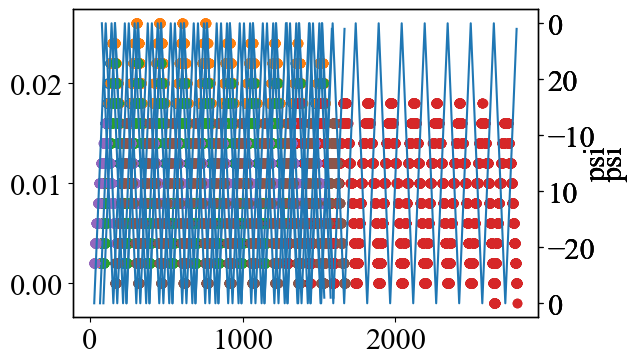

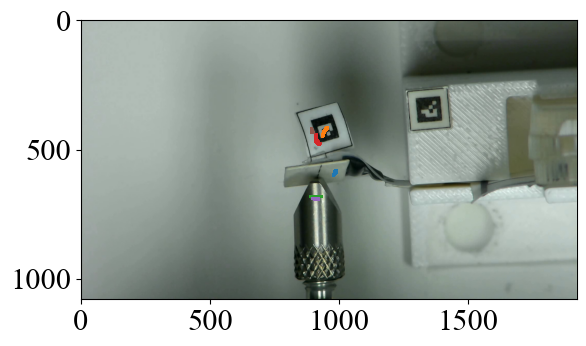

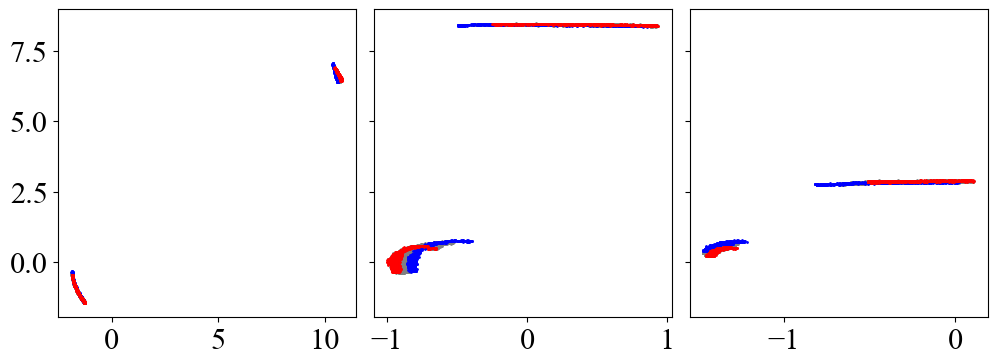

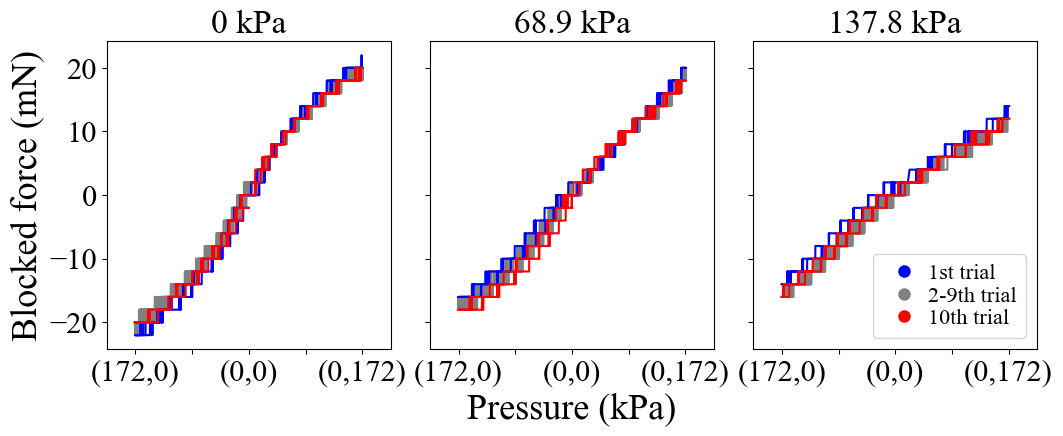

In [76]:
plt.rcParams['font.size'] = 20
n_cycle = 10

lines = []
lines_circle = []
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_img = plt.subplots()
fig, ax_disp = plt.subplots(1, 3, figsize=(12,4), sharey='row', gridspec_kw={'wspace': 0.06, 'hspace': 0.4})
fig, ax_force = plt.subplots(1, 3, figsize=(12,4), sharey='row', gridspec_kw={'wspace': 0.14, 'hspace': 0.4})

img = mpimg.imread(os.path.join(data_folder, result_name_arr[1], 'processed', 'frame_1000.png'))
ax_img.imshow(img)

for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    all_keys = ['t', 'rot', 'disp', 'centroid', 'angle_wrt_fixed']
    for key in all_keys:
        if 2 in camera_data_dict[key]:
            camera_data_dict[key][1] = camera_data_dict[key][2]  
    
    
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    ax = ax_ori
    # ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    # ax.plot(camera_data_dict['t'][1], camera_data_dict['rot'][1], linestyle='-')
    # ax.set_xlabel('Time')
    # ax.set_ylabel('Angle')
    ax.scatter(times_dict['force_sensor_force'], values_dict['force_sensor_force'])
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')

    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    t_cycle_f, cycle_start_idx_f = calc_cycle(n_cycle, times_dict['force_sensor_force'], r_time) 
    
    ax = ax_img
    ax.scatter(
            camera_data_dict['centroid'][1][:, 0], 
            camera_data_dict['centroid'][1][:, 1], 
            linestyle='-',
            label=f'Trial {i+1}',
            s=1
        )
    # xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2])
    # ax.scatter([xc], [yc], s=1, color='red')

    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp'][1][:, :2]*camera_scale[0])
    # lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles)))
    # ax.scatter([xc]/camera_scale[0], [yc]/camera_scale[0], s=1, color='red')

    print('ii', ii, 'force', np.min(values_dict['force_sensor_force']), np.max(values_dict['force_sensor_force']))

    for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-1:
            color = 'red'
        else:
            color = 'grey'
            
        ax = ax_force[ii//2]   
        start_idx = cycle_start_idx_f[i]
        end_idx = cycle_start_idx_f[i+1]
        
        cur_t = np.copy(t_cycle_f[start_idx:end_idx] - t_cycle_f[start_idx])
        cur_f = np.copy(values_dict['force_sensor_force'][start_idx:end_idx])
        cur_f -= cur_f[0]

        if ii % 2 == 1:
            sign = -1
        else:
            sign = 1
            
        line = ax.plot(
                sign*cur_t ,
                sign*cur_f*1000,
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        
        if ii == 2:
            lines.append(line)

        ax = ax_disp[ii//2]
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        ax.scatter(
            camera_data_dict['disp'][1][start_idx:end_idx, 0]*camera_scale[0]-xc,#-base_disp[0], 
            camera_data_dict['disp'][1][start_idx:end_idx, 1]*camera_scale[0]-yc,#-base_disp[1], 
            linestyle='-',
            label=f'Trial {i+1}',
            s=1,
            color=color
        )
    
    # ax.legend()
print(lines)
psi = [0, 68.9, 137.8]
for i, ax in enumerate(ax_force):
    ax.set_xlim(-np.max(np.abs(cur_t))*1.25, np.max(np.abs(cur_t))*1.25)
    # #map tmime to pressure
    ax.set_xticks([map_range(tmp, -25, 25, 
                             -np.max(np.abs(cur_t)), 
                             np.max(np.abs(cur_t))) for tmp in [-25, -12.5, 0, 12.5, 25]])
    ax.set_xticklabels(['(172,0)', '', '(0,0)', '', '(0,172)'])
    
    ax.set_title(f'{psi[i]} kPa', fontsize='24')
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    if i == 0:
        ax.set_ylabel('Blocked force (mN)', )
    if i == 1:
        ax.set_xlabel('Pressure (kPa)', )
    if i == 2:
        legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend,
                          )

# for i, ax in enumerate([ax_force[1]):
#     ax.set_xlim(-6, 8)
#     ax.set_xticks([-5, -2.5, 0, 2.5, 5, 7.5])
#     ax.set_xticklabels(['-5', '', '0', '', '', '7.5',])
#     ax.set_ylim(-6, 8)
#     ax.set_yticks([-5, -2.5, 0, 2.5, 5, 7.5])
#     ax.set_yticklabels(['-5', '', '0', '', '', '7.5',])
#     ax.axis('equal')
#     # ax.set_aspect('equal')
#     if i == 0:
#         ax.set_ylabel('Displacement-Y (mm)', )
#     if i == 2:
#         ax.legend(handles=[lines_circle[i][0]], labels=['Fitted circular arc'], fontsize=fontsize_legend,)
#     if i == 1:
#         ax.set_xlabel('Displacement-X (mm)', )

# fig.text(0.06, 0.5, , va='center', rotation='vertical')
plt.tight_layout()

plt.savefig(os.path.join(figures_dir, 'bidir-continuous-force.pdf'), dpi=600, bbox_inches='tight')
plt.show()

# Exp 3-1-force-new (with Omega sensor)

In [5]:
result_name_arr = [
    # 'exp_3_1_force_new_20240905_13-11-33_bidir-compound-5',
    # 'exp_3_1_force_new_callibrate_20240905_14-31-30_0.583g'
    # 'exp_3_1_force_new_20240905_20-39-55_pulling-bidir-5',
    # 'exp_3_1_force_new_20240906_10-38-27_pulling-bidir-3-cardboard'
    # 'exp_3_1_force_new_callibrate_20240905_21-12-56_0.846g_pulling'
    # 'exp_3_1_force_new_callibrate_20240906_14-28-00_2.26g'

    # pushing with sphere
    # 'exp_3_1_force_new_callibrate_20240906_14-56-48_2.26g', #calibration vertical
    # 'exp_3_1_force_new_callibrate_20240906_17-13-10_1.13g-side', #calibration from side
    # 'exp_3_1_force_new_callibrate_20240906_17-18-38_1.13g-top' #calibration again, vertical
    # 'exp_3_1_force_new_callibrate_20240906_17-42-04_1.13g-side' #calibration again, side right (use this one)
    # 'exp_3_1_force_new_20240906_15-33-50_pushing-sphere'

    # 9/7 callibrate
    # 'exp_3_1_force_new_callibrate_20240907_14-39-30_1.13g',
# 9/7 night calibrate
    # 'exp_3_1_force_new_callibrate_20240907_20-53-02_1.13g'
    # @ 9/8 noon calibrate
    # 'exp_3_1_force_new_callibrate_20240908_11-45-45_1.13g',
    
    'exp_3_1_force_new_20240908_11-50-29_diamond', # diamond-pos
    # 'exp_3_1_force_new_20240908_15-02-39_diamond_new',
    '', # diamond-neg,
    'exp_3_1_force_new_20240908_12-41-42_bidir-rect-pos-new',#plot
    # 'exp_3_1_force_new_20240908_14-20-36_bidir-rect-neg-new',
    'exp_3_1_force_new_20240908_13-20-48_bidir-rect-neg-new', #plot
    # 'exp_3_1_force_new_20240907_19-58-03_bidir-rect-pos', # bidir-rect pos
    # 'exp_3_1_force_new_20240907_21-08-31_bidir-rect-neg', # bidir-rect neg

    # bidir compound
    # 'exp_3_1_force_new_20240907_15-12-51_bidir-compound-pos',
    'exp_3_1_force_new_20240907_17-58-39_bidir-compound-pos-new',#plot
    'exp_3_1_force_new_20240907_17-13-27_bidir-compound-neg'#plot
    
]
no_camera = False
tag_offset_dict = {
    1: {
        'rot': -180,
        'disp': [-0,-3.25]
    }
}
ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, 
                                                                                                           result_name_arr, 
                                                                                                           ids,
                                                                                                          tag_offset_dict=tag_offset_dict,
                                                                                                          no_camera=no_camera)

found prior buffer, loading from ./data-raw\exp_3_1_force_new_20240908_11-50-29_diamond\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_3_1_force_new_20240908_11-50-29_diamond\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_3_1_force_new_20240908_11-50-29_diamond\processed\frame_1000.png. Skipping...
loaded keys:  ['force_omega', 'info_CYCLE_DONE', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'regulator_PWM9', 'regulator_PWM10', 'regulator_PWM11', 'regulator_PWM12', 'camera_1', 'camera_0', 'camera_time']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'angle_wrt_horiz', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])
found prior buffer, loading from ./data-raw\exp_3_1_force_new_20240908_12-41-42_bidir-rect-pos-new\processed\load_data.p

n cycle 10 cycle len 100
ii 0 force 0.0 1192.0
n cycle 10 cycle len 100
ii 2 force 0.0 1157.0
n cycle 10 cycle len 100
ii 3 force 0.0 952.0
n cycle 10 cycle len 100
ii 4 force 0.0 969.0
n cycle 10 cycle len 100
ii 5 force 0.0 1015.0


C:\Users\harry\AppData\Local\Temp\ipykernel_16464\2790839002.py:260: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


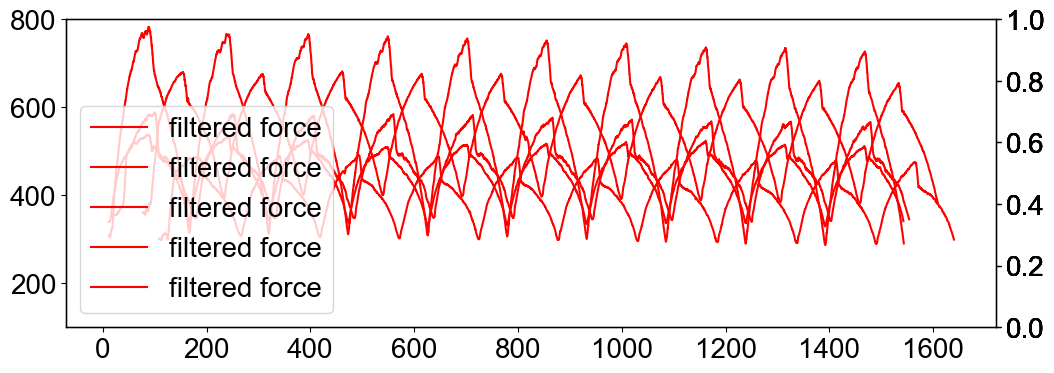

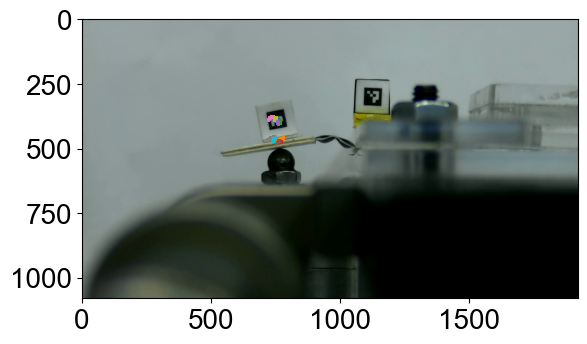

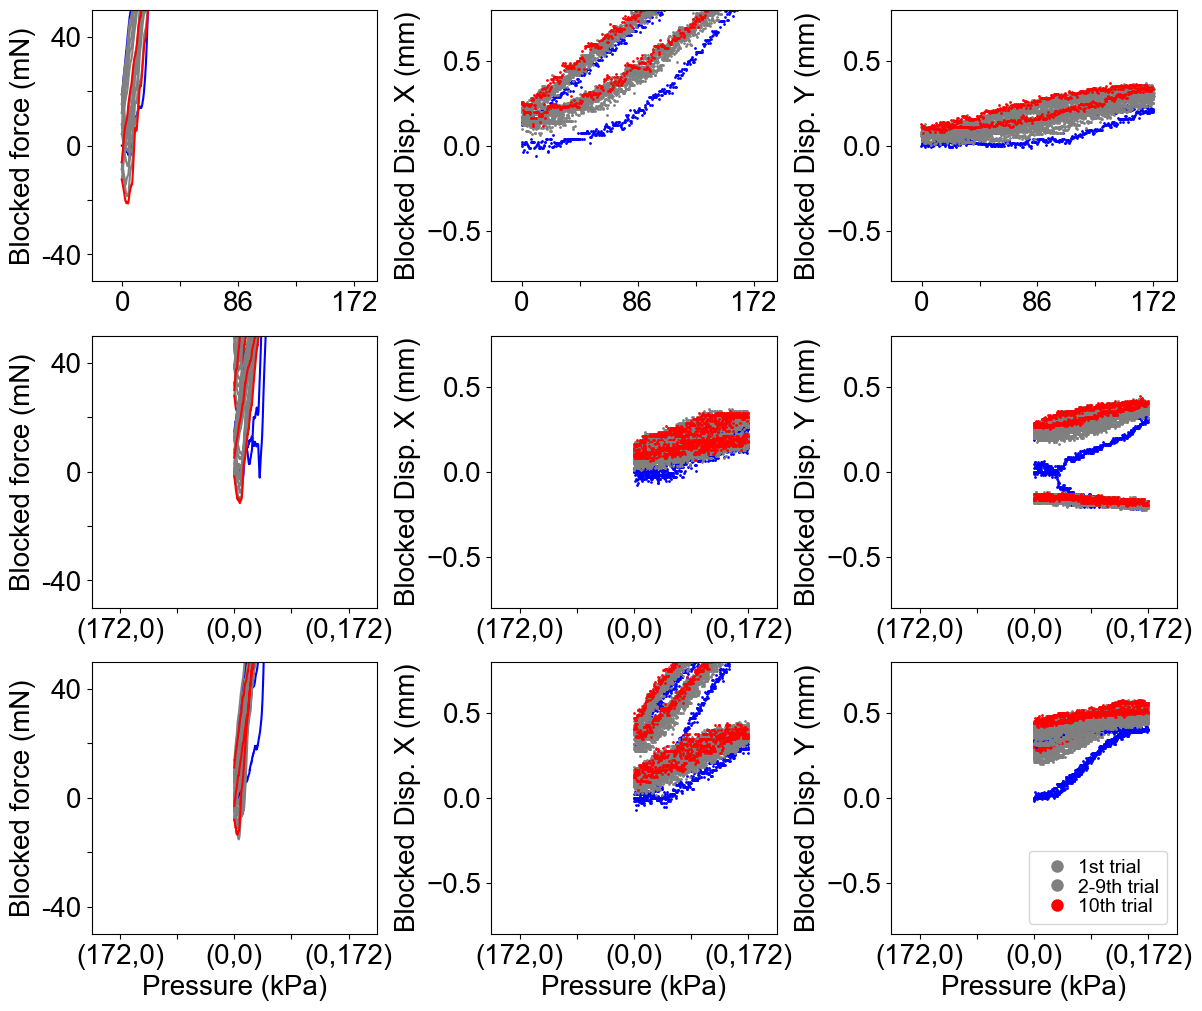

In [9]:
ForceScale = 0.079  #mN/mV
ForceScaleUp = 0.079-.01 # (increasing pressure)
ForceScaleDown = 0.079 + 0.01 # (decresasing pressure)

base_angle = 0
import scipy
def filter_force(time, chan, ax):
    chan = np.copy(chan)
    kernWidth = 50
    kernel = np.zeros(2*kernWidth)  # pad with zeros to make causal
    kernel[kernWidth:] = 1/kernWidth
    chan=scipy.signal.medfilt(chan,5)  # median over 5 samples

    # ax.plot(time, chan)
    
    chan = np.convolve(chan,kernel)
    chan = chan[kernWidth:np.size(chan)-kernWidth+1]  # truncate leading/trailing convolution
    return chan
    
plt.rcParams['font.size'] = 20
n_cycle = 10

lines = []
lines_circle = []
fig, ax_ori = plt.subplots(1, 1, figsize=(12,4))
if not no_camera:
    fig, ax_img = plt.subplots()
    fig, ax_force = plt.subplots(3, 3, figsize=(14,12),gridspec_kw={'wspace': 0.4, 'hspace': 0.2})
    
if not no_camera:
    
    img = mpimg.imread(os.path.join(data_folder, result_name_arr[0], 'processed', 'frame_1000.png'))
    ax_img.imshow(img)

data_export = []
for _ in range(6):
    data_export.append([])
    for _ in range(10):
        data_export[-1].append({'Pressure': np.array([]), 'PWM_values': np.array([])})

data_export_disp = []
for _ in range(6):
    data_export_disp.append([])
    for _ in range(10):
        data_export_disp[-1].append({'Pressure': np.array([]), 'Disp-X': np.array([]),'Disp-Y': np.array([])})


for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    if len(values_dict) == 0:
        continue

    if not no_camera:
        camera_scale_single = 3 / camera_data_dict['corners_len'][1][0]
    # r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_val = values_dict['regulator_PWM7']
    r_time = times_dict['regulator_PWM7']
    ax = ax_ori
    # ax.plot(times_dict['force_omega'], values_dict['force_omega'])
    # df = pd.DataFrame({'Time': times_dict['force_omega'], 'Force': values_dict['force_omega']})
    # df.to_csv(f'data_export/force/callibration.csv', index=False)

    force_filtered = filter_force(times_dict['force_omega'], values_dict['force_omega'], ax)
    force_filtered[0:50] = force_filtered[51]
 
    ax.plot(times_dict['force_omega'], force_filtered, color='red', label='filtered force')
    if not no_camera:
        ax1 = ax.twinx()
        # ax1.plot(camera_data_dict['t'][1],  (camera_data_dict['centroid'][1][:, 0] -  camera_data_dict['centroid'][1][0, 0])*camera_scale[0], label='rel disp X')
        # ax1.plot(camera_data_dict['t'][1],  -1 * (camera_data_dict['centroid'][1][:, 1] - camera_data_dict['centroid'][1][0, 1])*camera_scale[0], label='rel disp Y')
        # ax1.legend()
    ax.set_ylim(100, 800)
    # ax.set_xlim(0, 200)
    
    
    ax.legend()
    if not no_camera:
        cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
        ax = ax_img
        ax.scatter(
                camera_data_dict['centroid'][1][:, 0], 
                camera_data_dict['centroid'][1][:, 1], 
                linestyle='-',
                # label=f'Trial {i+1}',
                s=1
            )
        ax.scatter(
                camera_data_dict['centroid_offset'][1][:, 0], 
                camera_data_dict['centroid_offset'][1][:, 1], 
                linestyle='-',
                # label=f'Trial {i+1}',
                s=1
            )
    pwm_filtered = np.copy(force_filtered - force_filtered[0])
    force_filtered = (force_filtered - force_filtered[0])
    t_cycle_f, cycle_start_idx_f = calc_cycle(n_cycle, times_dict['force_omega'], r_time) 

    print('ii', ii, 'force', np.min(values_dict['force_omega']), np.max(values_dict['force_omega']))

    # for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
    for i in range(n_cycle) :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-1:
            color = 'red'
        else:
            color = 'grey'
            
        ax = ax_force[ii//2][0]   
        start_idx = cycle_start_idx_f[i]
        end_idx = cycle_start_idx_f[i+1]
        
        cur_t = np.copy(t_cycle_f[start_idx:end_idx] - t_cycle_f[start_idx])
        cur_f = np.copy(force_filtered[start_idx:end_idx])
        # cur_f -= force_[0]
        # print('data export', len(data_export), ii//2, i)
        
        cur_pressure = map_range(cur_t, np.min(cur_t), np.max(cur_t), 
                             0, 
                             172)
        if ii % 2 == 1:
            sign = 1
        else:
            sign = 1
        data_export[ii][i]['Pressure'] = np.append(data_export[ii][i]['Pressure'], sign*cur_pressure)
        data_export[ii][i]['PWM_values'] = np.append(data_export[ii][i]['PWM_values'], sign*pwm_filtered[start_idx:end_idx])

        line = ax.plot(
                sign*cur_t ,
                sign*cur_f,
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        if ii == 0:
            lines.append(line)
        if not no_camera:
            
            start_idx = camera_data_dict['cycle_start_idx'][1][i]
            end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
            cur_t = np.copy(camera_data_dict['t_cycle'][1][start_idx:end_idx])
            cur_pressure = map_range(cur_t, np.min(cur_t), np.max(cur_t), 0, 172)
            cur_pressure *= sign
            cur_t *= sign
            cur_x = sign*(camera_data_dict['centroid_offset'][1][start_idx:end_idx, 0]-camera_data_dict['centroid_offset'][1][0, 0])*camera_scale_single
            cur_y =  -sign*(camera_data_dict['centroid_offset'][1][start_idx:end_idx, 1] - camera_data_dict['centroid_offset'][1][0, 1])*camera_scale_single
            
            data_export_disp[ii][i]['Pressure'] = np.append(data_export_disp[ii][i]['Pressure'], cur_pressure )
            data_export_disp[ii][i]['Disp-X'] = np.append(data_export_disp[ii][i]['Disp-X'], cur_x )
            data_export_disp[ii][i]['Disp-Y'] = np.append(data_export_disp[ii][i]['Disp-Y'], cur_y )

            ax = ax_force[ii//2][1]    
            start_idx = camera_data_dict['cycle_start_idx'][1][i]
            end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
            ax.scatter(cur_t, 
                     cur_x, 
                    linestyle='-',
                    label=f'#{i+1}',
                    color=color,
                       s=1,
                    )
            
            ax = ax_force[ii//2][2]

            ax.scatter(cur_t, 
                       cur_y, 
                       # camera_data_dict['centroid'][1][start_idx:end_idx, 1], 
                       linestyle='-',
                       label=f'Trial {i+1}',
                       s=1,
                       color=color)
psi = [0, 68.9, 137.8]
# if not no_camera:
#     # print(data_export)
#     for j in range(len(data_export)):
#         for k in range(len(data_export[j])):
#             if j == 1:
#                 continue
#             if j//2 == 0:
#                 label = 'diamond'
#             elif j//2 == 1:
#                 label = 'bidir-rect'
#             elif j//2 == 2:
#                 label = 'bidir-compound'
#             if j % 2 == 0:
#                 dir = 'top'
#             else:
#                 dir = 'bot'
#             df = pd.DataFrame(data_export[j][k])
#             df.to_csv(f'data_export/force/force_{label}_{dir}_{k}.csv', index=False)
    
#     for j in range(len(data_export_disp)):
#         for k in range(len(data_export_disp[j])):
#             if j == 1:
#                 continue
#             if j//2 == 0:
#                 label = 'diamond'
#             elif j//2 == 1:
#                 label = 'bidir-rect'
#             elif j//2 == 2:
#                 label = 'bidir-compound'
#             if j % 2 == 0:
#                 dir = 'top'
#             else:
#                 dir = 'bot'
#             df = pd.DataFrame(data_export_disp[j][k])
#             df.to_csv(f'data_export/force/force_disp_{label}_{dir}_{k}.csv', index=False)

for i, ax_arr in enumerate(ax_force):
    for j, ax in enumerate(ax_arr):
            if j == 0:
                ax.set_ylabel('Blocked force (mN)', )
            elif j == 1:
                ax.set_ylabel('Blocked Disp. X (mm)', )
            elif j == 2:
                ax.set_ylabel('Blocked Disp. Y (mm)', )
            if i == 2:
                ax.set_xlabel('Pressure (kPa)')
                
for i, ax_arr in enumerate(ax_force):    
    if i == 0:
        for j, ax in enumerate(ax_arr):
            ax.set_xlim(-10, np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])*1.1)
            ax.set_xticks([map_range(tmp, 0, 25, 
                             np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]), 
                             np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])) for tmp in [0, 6.25, 12.5, 18.75, 25]])
            ax.set_xticklabels(['0', '', '86', '', '172'])
    if i == 1 or i == 2:
        for j, ax in enumerate(ax_arr):
            ax.set_xlim(-np.max(np.abs(cur_t))*1.25, np.max(np.abs(cur_t))*1.25)
            ax.set_xticks([map_range(tmp, -25, 25, 
                                 -np.max(np.abs(cur_t)), 
                                 np.max(np.abs(cur_t))) for tmp in [-25, -12.5, 0, 12.5, 25]])
            ax.set_xticklabels(['(172,0)', '', '(0,0)', '', '(0,172)'])

    ax = ax_arr[0]
    ax.set_ylim(-50,50)
    ax.set_yticks([-40, -20, 0, 20, 40])
    ax.set_yticklabels(['-40', '', '0', '', '40'])
    
    ax = ax_arr[1]
    ax.set_ylim(-0.8,0.8)

    ax = ax_arr[2]
    ax.set_ylim(-0.8,0.8)
    # if i == 1:
    #     ax.set_xlabel('Pressure (kPa)', )
    if i == 2:
        ax = ax_arr[2]
        legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend)

# fig.text(0.06, 0.5, , va='center', rotation='vertical')
plt.tight_layout()

plt.savefig(os.path.join(figures_dir, 'bidir-continuous-force-omega.pdf'), dpi=600)
plt.show()

# ? Exp 3-3 (binary finger actuation)
## Prep data

In [47]:
# OLD DESIGN
# result_name = 'exp_3_3_20240222_17-19-25' # non-time-varying
# result_name = 'exp_3_3_20240223_17-57-18_backbone_20' # time-varying
# result_name = 'exp_3_3_20240223_18-36-19_backbone_0' # time-varying
# result_name = 'exp_3_3_20240224_10-05-02_backbone_10'
# result_name = 'exp_3_3_20240224_11-15-40_backbone_20_0_25' #10 backbone but only 0 to 25
# result_name = 'exp_3_3_20240224_11-51-57_backbone_10_0_25' # same exp as previous
n_cycle = 100
# NEW DESIGN (BOTH FINGERS SAME)
# result_name = 'exp_3_3_20240226_17-16-48_backbone_0' # still time-varying
# result_name = 'exp_3_3_20240227_10-07-59_timeout_20_backbone_0' #20sec timeout
# result_name = 'exp_3_3_20240227_12-32-44_timeout_20_backbone_10' #20sec timeout, 33 trials, stopped in the middle
# n_cycle = 33
# result_name = 'exp_3_3_20240227_15-20-25_timeout_20_backbone_20' #3 trials
# n_cycle = 3

# result_name = 'exp_2_3_20240224_12-14-57' # base joint actuator
# result_folder = os.path.join(data_folder, result_name)

# values_dict, times_dict, camera_dict, camera_data_dict, camera_scale = default_data_prep(result_folder, ids=[0, 2])

result_name_arr = [
    'exp_3_3_20240227_10-07-59_timeout_20_backbone_0',
    # 'exp_3_3_20240227_12-32-44_timeout_20_backbone_10',
    # 'exp_3_3_20240227_15-20-25_timeout_20_backbone_20'
]

n_cycle_arr = [100,33,3]

ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, result_name_arr, ids)


found prior buffer, loading from ./data-raw\exp_3_3_20240227_10-07-59_timeout_20_backbone_0\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_3_3_20240227_10-07-59_timeout_20_backbone_0\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_3_3_20240227_10-07-59_timeout_20_backbone_0\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_2', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'info_CYCLE_DONE', 'camera_37', 'camera_17']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])


## Figures

n cycle 100 cycle len 4


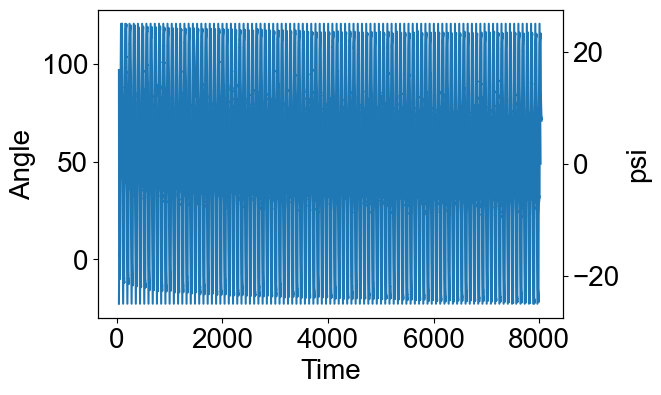

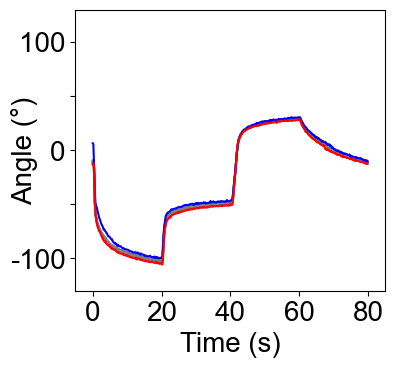

In [48]:
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_angle = plt.subplots(1, 1, figsize=(4,3.65), sharex=True, sharey=True, gridspec_kw={'wspace': 0.06})
lines = []
for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    n_cycle = n_cycle_arr[ii]
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    
    all_keys = ['t', 'rot', 'disp', 'centroid','angle_wrt_fixed']
    for key in all_keys:
        if 2 in camera_data_dict[key]:
            camera_data_dict[key][1] = camera_data_dict[key][2]  

    ax = ax_ori
    # ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')
    
    ax = ax_angle
    # ax1 = axes[1]
    legend_labels = []
    n_cycle= 10
    for i in list(range(1, n_cycle-2))+[0, n_cycle-2] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-2:
            color = 'red'
        else:
            color = 'grey'
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
    
        # if i > 10:
            # continue
        cur_t = camera_data_dict['t'][1][start_idx:end_idx] -camera_data_dict['t'][1][start_idx]
        cur_angle = camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-90
        ax.plot(cur_t, 
                cur_angle, 
                linestyle='-',
                label=f'Trial {i+1}',
                color=color
                )
        # exponential fitting
        # if i == 1:
        #     timestamps = [0, 20, 40, 60, 80]
    
        #     for j, t in enumerate(timestamps):
        #         if j == len(timestamps) - 1:
        #             break
        #         idx1 = np.where(cur_t >= t)[0][0]
        #         print(np.max(cur_t), np.min(cur_t))
        #         if j == len(timestamps) - 2:
        #             idx2 = -1
        #         else:
        #             idx2 = np.where(cur_t >= timestamps[j+1])[0][0]
        #         exp_params = exponential_fit(cur_t[idx1:idx2]-cur_t[idx1], cur_angle[idx1:idx2])
        #         print('exp params', exp_params)
        #         line = ax.plot(cur_t[idx1:idx2], rc_charging(cur_t[idx1:idx2]-cur_t[idx1], exp_params[0], exp_params[1], exp_params[2]),
        #                # label=f'tau={exp_params[1]:.2f}'
        #                )
        #         legend_labels.append(r'$\tau$' + f'={exp_params[1]:.1f}')
        #         lines.append(line)
        
        # ax1.scatter(i, camera_data_dict['rot'][1][(start_idx+end_idx)//2]-90)
        # if i == 1:
            # break
        # if i == n_cycle-2:
            # break
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=line[0].get_color(), markersize=10) for line in lines]
    # legend = ax.legend(legend_handles, legend_labels, ncol=2, labelspacing=0.1, columnspacing =0.05,loc='lower right', handletextpad=0.1, fontsize=fontsize_legend,)
    lines = []
    
psi = [0, 68.9, 137.8]
for i, ax in enumerate([ax_angle]):

    ax.set_xlim(-5, 85)
    ax.set_xticks([0, 20, 40, 60,80])

    ax.set_ylim(-130, 130)
    ax.set_yticks([-100, -50, 0, 50,100])
    ax.set_yticklabels(['-100', '', '0','', '100'])
    
    # ax.set_title(f'{psi[i]} kPa', fontsize='24')
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    if i == 0:
        ax.set_ylabel('Angle (°)',labelpad=-20)
    # if i == 1:
        ax.set_xlabel('Time (s)')

  
plt.savefig(os.path.join(figures_dir, 'bidir-step-response.pdf'), dpi=600, bbox_inches = 'tight')
plt.show()

## Test

fitted circle: x -1110.49 y 541.61 r 110.13 sigma 2.35
fitted circle: x 647.92 y 635.42 r 110.23 sigma 2.34
circle error:  2.336675


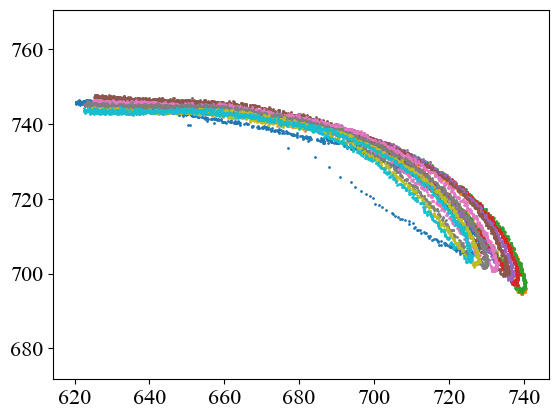

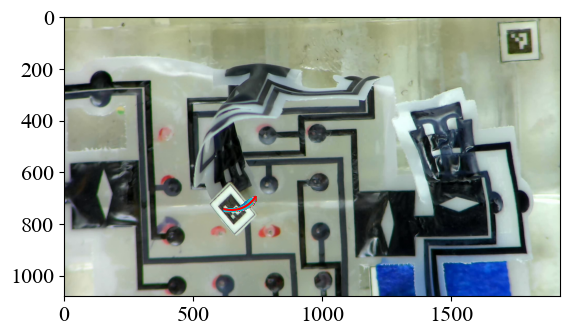

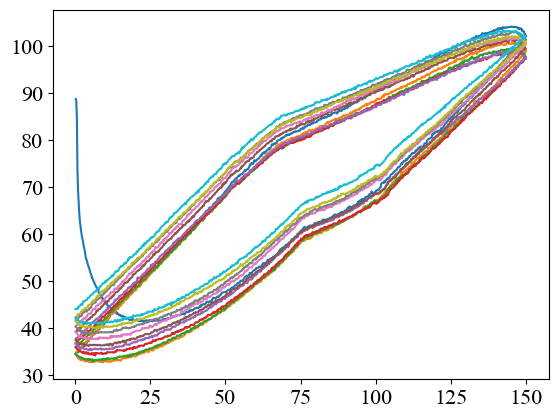

In [194]:
fig, ax = plt.subplots(1, 1)

img = mpimg.imread(os.path.join(result_folder, 'processed', 'frame_1000.png'))
fig, ax2 = plt.subplots()
ax2.imshow(img)

for i in range(n_cycle):
    # if i != 0:
        # continue
    start_idx = camera_data_dict['cycle_start_idx'][1][i]
    end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
    ax.scatter(
        camera_data_dict['centroid'][1][start_idx:end_idx, 0], 
        camera_data_dict['centroid'][1][start_idx:end_idx, 1], 
        linestyle='-',
        label=f'Trial {i+1}',
        s=1
    )
    ax2.scatter(
        camera_data_dict['centroid'][1][start_idx:end_idx, 0], 
        camera_data_dict['centroid'][1][start_idx:end_idx, 1], 
        linestyle='-',
        label=f'Trial {i+1}',
        s=1
    )
   
ax.axis('equal')
xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp'][1][:, :2])
# plot_circle_arc(ax, [xc*camera_scale[0], yc*camera_scale[0]], r*camera_scale[0], np.min(angles)*camera_scale[0], np.max(angles)*camera_scale[0])
xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2])
plot_circle_arc(ax2, [xc, yc], r, np.min(angles), np.max(angles))

print('circle error: ', sigma)


fig, ax = plt.subplots(1, 1)
for i in range(n_cycle):
    # if i != 0:
        # continue
    start_idx = camera_data_dict['cycle_start_idx'][1][i]
    end_idx = camera_data_dict['cycle_start_idx'][1][i+1]
    ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
            np.rad2deg(angles)[start_idx:end_idx], 
            linestyle='-',
            label=f'Trial {i+1}'
            )



                                 

# *Exp 3-3-1 (single bidir actuator actuation)

In [29]:
result_name_arr = [
    # 'exp_3_3_single_20240325_17-54-28_timeout_20_backbone_0',
    # 'exp_3_3_single_20240325_18-22-31_timeout_20_backbone_10',
    # 'exp_3_3_single_20240325_18-28-35_timeout_20_backbone_20'
    # 'exp_3_3_single_20240519_21-08-15_bidir-single',
   
    
    'exp_3_3_single_20240520_16-28-43_bidir-single', # 10 trials # using for paper
    # 'exp_3_3_single_20240520_17-45-12_bidir-twopouch',
    'exp_3_3_single_20240520_18-06-50_bidir-twopouch', # using for paper
    # 'exp_2_3_20240520_16-48-49_onedir-diamond'
    
]
tag_offset_dict = {
    1: {
        'rot': -180,
        'disp': [3.25,-3.25]
    }
}

n_cycle_arr = [10, 10]

ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, result_name_arr, ids,
                                                                                                          tag_offset_dict=tag_offset_dict)

found prior buffer, loading from ./data-raw\exp_3_3_single_20240520_16-28-43_bidir-single\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_3_3_single_20240520_16-28-43_bidir-single\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_3_3_single_20240520_16-28-43_bidir-single\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'info_CYCLE_DONE', 'camera_17', 'camera_42']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])
found prior buffer, loading from ./data-raw\exp_3_3_single_20240520_18-06-50_bidir-twopouch\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at .

fitted circle: x -3.41 y 9.48 r 4.14 sigma 0.03
circle error 0.032984484996240536 0.032984484996240536
n cycle 10 cycle len 4
start
range 116.05383 std 57.226192
mid
range 36.737934 std 11.906385
[-47.990154 -46.854614 -46.8655   -33.998993 -46.179024 -11.25222
 -46.641617 -45.959442]
end
range 0.41912842 std 0.11339623
traj
max range 68.19355 avg range 8.460128 range std 16.877407
new mid 3.1582413
new traj range 1.7377326 16.332169
fitted circle: x -6.63 y 9.63 r 4.15 sigma 0.05
circle error 0.04567617120559732 0.04567617120559732
n cycle 10 cycle len 4
start
range 231.1127 std 113.728935
mid
range 1.8748474 std 0.61314213
[-117.59827  -116.660324 -116.65953  -115.864    -115.72342  -116.00873
 -115.72342  -115.940445]
end
range 1.22995 std 0.3790507
traj
max range 123.08324 avg range 6.244789 range std 16.646442
new mid 4.2480545
new traj range 2.7173924 44.528618


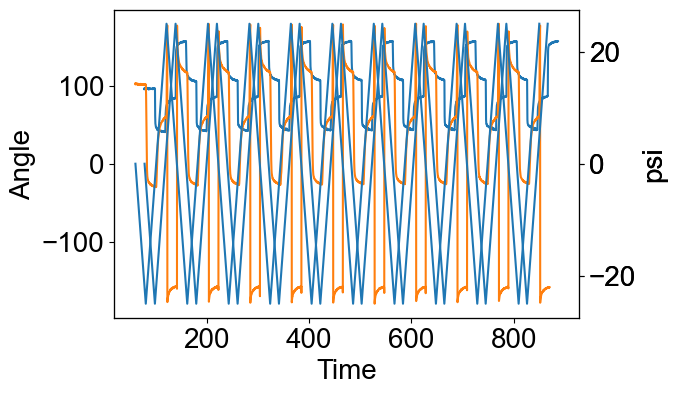

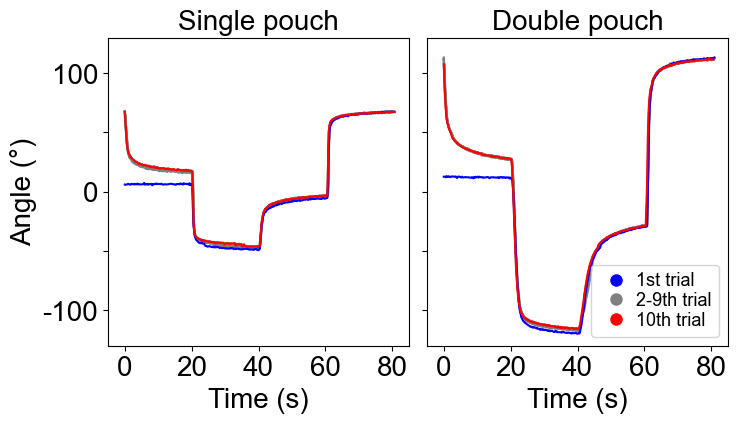

In [31]:
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_angle = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True, gridspec_kw={'wspace': 0.06})
lines = []
for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    n_cycle = n_cycle_arr[ii]
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0])
    circle_error = calc_circle_fit_err(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0], xc, yc, r)
    print('circle error', np.sqrt(np.mean(circle_error**2)), np.std(circle_error))
    
    ax = ax_ori
    # ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')
    
    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_angle[ii]
    # ax1 = axes[1]
    legend_labels = []
    camera_data_dict['angle_wrt_fixed'][1][camera_data_dict['angle_wrt_fixed'][1] < -120] += 360

    angle_plot_arr = []
    angle_mid_arr = []
    angle_allval_arr = []
    for _ in range(80):
        angle_allval_arr.append([])
    for i in list(range(1, n_cycle-2))+[0, n_cycle-2] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-2:
            color = 'red'
        else:
            color = 'grey'
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        
        # if i != 1:
        #     continue
        cur_t = camera_data_dict['t'][1][start_idx:end_idx] -camera_data_dict['t'][1][start_idx]
        cur_angle = camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-90
        angle_mid_arr.append(cur_angle[np.argmin(np.abs(cur_t - 40))])

        # save as csv to file
        if ii == 0:
            df = pd.DataFrame({'Time': cur_t, 'Angle': cur_angle})

            # Save DataFrame to CSV
            df.to_csv(f'data_{i}.csv', index=False)
            
        if i != 0:
            for tmp in range(0, 80):
                angle_allval_arr[tmp].append(cur_angle[np.argmin(np.abs(cur_t - tmp))])
        
        if i != 0:
            angle_plot_arr.append(np.copy(cur_angle))
        lines.append(ax.plot(cur_t, 
                cur_angle, 
                linestyle='-',
                label=f'Trial {i+1}',
                color=color
                ))
        # exponential fitting
        if i == 1:
            continue
            timestamps = [0, 20, 40, 60, 80]
    
            for j, t in enumerate(timestamps):
                if j == len(timestamps) - 1:
                    break
                idx1 = np.where(cur_t >= t)[0][0]
                print(np.max(cur_t), np.min(cur_t))
                if j == len(timestamps) - 2:
                    idx2 = -1
                else:
                    idx2 = np.where(cur_t >= timestamps[j+1])[0][0]
                exp_params = exponential_fit(cur_t[idx1:idx2]-cur_t[idx1], cur_angle[idx1:idx2])
                print('exp params', exp_params)
                line = ax.plot(cur_t[idx1:idx2], rc_charging(cur_t[idx1:idx2]-cur_t[idx1], exp_params[0], exp_params[1], exp_params[2]),
                       # label=f'tau={exp_params[1]:.2f}'
                       )
                legend_labels.append(r'$\tau$' + f'={exp_params[1]:.1f}')
                lines.append(line)
        
        # ax1.scatter(i, camera_data_dict['rot'][1][(start_idx+end_idx)//2]-90)
        # if i == 1:
            # break
        # if i == n_cycle-2:
            # break
    # legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=line[0].get_color(), markersize=10) for line in lines]
    # legend = ax.legend(legend_handles, legend_labels, ncol=2, labelspacing=0.1, columnspacing =0.05,loc='lower right', handletextpad=0.1, fontsize=fontsize_legend,)
    # lines = []
    calc_angle_var(angle_plot_arr)
    range_arr_by_val = []
    for tmp in range(80):
        range_arr_by_val.append(np.max(angle_allval_arr[tmp]) - np.min(angle_allval_arr[tmp]))
    print('new mid', np.max(angle_mid_arr) - np.min(angle_mid_arr))
    print('new traj range', np.mean(range_arr_by_val), np.max(range_arr_by_val))
    
subtitles = ['Single pouch', 'Double pouch']
for i, ax in enumerate(ax_angle):
    # ax.set_ylim(-130, 50)
    # ax.set_yticks([-100, -50, 0, 50])

    ax.set_xlim(-5, 85)
    ax.set_xticks([0, 20, 40, 60,80])

    ax.set_ylim(-130, 130)
    ax.set_yticks([-100, -50, 0, 50,100])
    ax.set_yticklabels(['-100', '', '0','', '100'])

    ax.set_title(subtitles[i], fontsize=fontsize_main)
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    if i == 0:
        ax.set_ylabel('Angle (°)',)
    
    ax.set_xlabel('Time (s)')
    if i == 1:
        legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend-1
                          )

  
plt.savefig(os.path.join(figures_dir, 'bidir-single-step.pdf'), dpi=600, bbox_inches = 'tight')
plt.show()

# Exp 3-3-repeatability

In [5]:


result_name_arr = [
    'exp_3_3_repeatability_20240913_17-00-18_1000',
    
]
tag_offset_dict = {
    1: {
        'rot': -180,
        'disp': [3.25,-3.25]
    }
}

n_cycle_arr = [1000]

ids=[0, 1, 2,3,4,5,6,7,8,9]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, result_name_arr, ids,
                                                                                                          tag_offset_dict=tag_offset_dict)

found prior buffer, loading from ./data-raw\exp_3_3_repeatability_20240913_17-00-18_1000\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_3_3_repeatability_20240913_17-00-18_1000\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_3_3_repeatability_20240913_17-00-18_1000\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_0', 'camera_1', 'camera_3', 'camera_4', 'camera_9', 'camera_6', 'camera_2', 'camera_5', 'camera_8', 'camera_7', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'regulator_PWM9', 'regulator_PWM10', 'regulator_PWM11', 'regulator_PWM12', 'info_CYCLE_DONE', 'camera_17', 'camera_34', 'camera_30', 'camera_37', 'camera_32', 'camera_42']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'angle_wrt_horiz', 'centroid', 'corners', 'disp_offset', 'rot_offse

n cycle 1000 cycle len 6
skip 1 4
skip 2 2
skip 3 2
max 52 t 10.372914552688599
min 27 t 5.370571613311768
skip 4 2
skip 5 4
skip 6 2
skip 7 2
skip 8 2
skip 9 3
1 range 106.91816221347719 change 3.716475184405425 percentage 0.034759998745441945
2 range 114.59642692659261 change 4.785267283697294 percentage 0.04175756096446714
3 range 101.83766803869028 change 6.287954816952066 percentage 0.06174488220373565
4 range 106.57336324641858 change 4.723331975688552 percentage 0.0443200048474334
5 range 90.32970601193333 change 3.520663443454893 percentage 0.03897569912371666
6 range 114.79987315156002 change 4.904634603885896 percentage 0.042723345150484135
7 range 100.48424224003429 change 9.453915757108845 percentage 0.0940835652074239
8 range 93.4128928353164 change 4.19193735201344 percentage 0.044875361684855175
9 range 99.97987112074813 change 4.187314987993489 percentage 0.04188158017263661


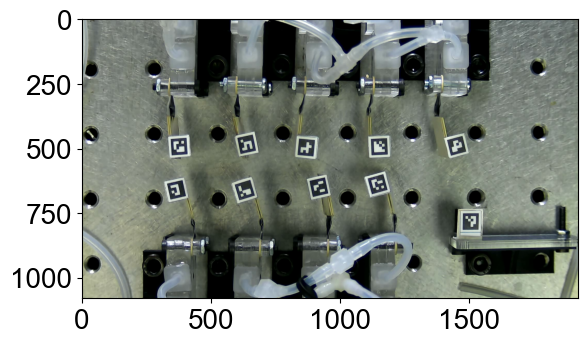

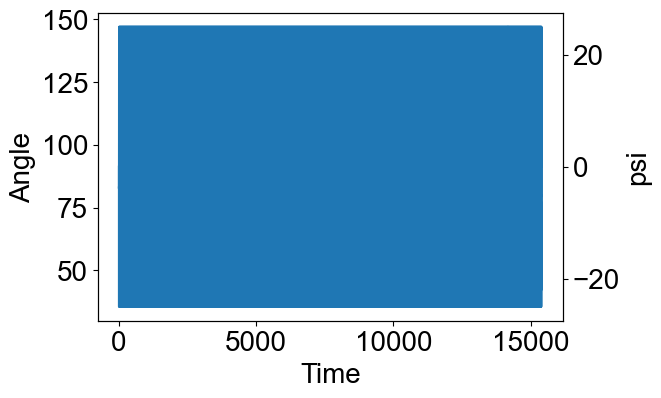

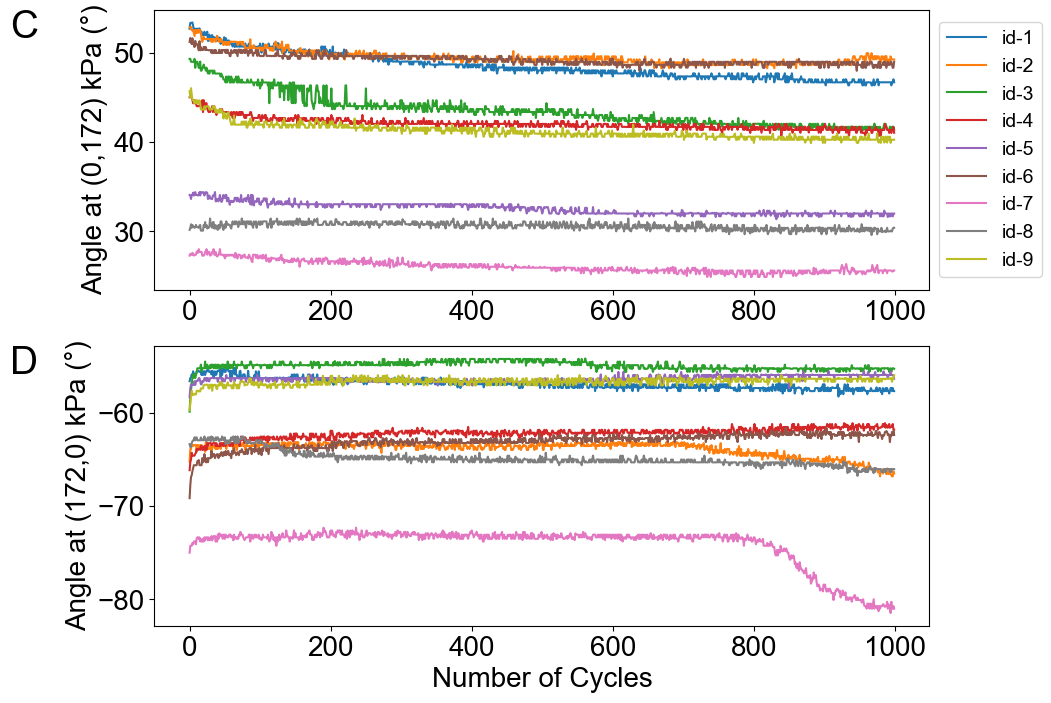

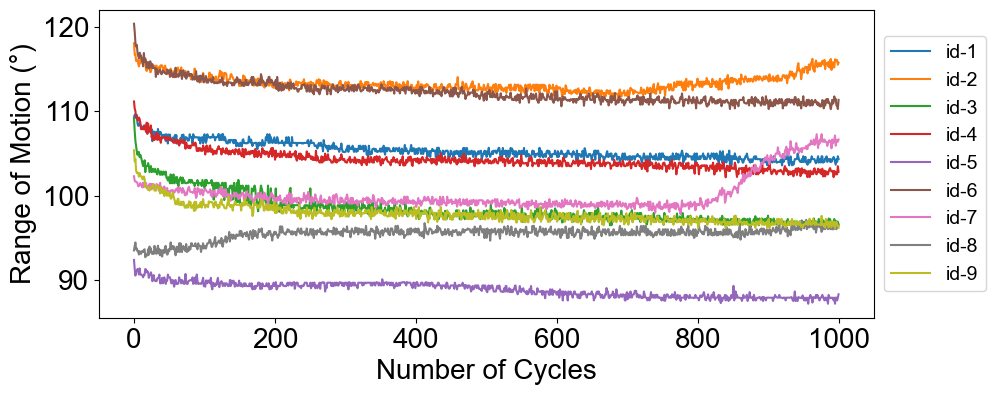

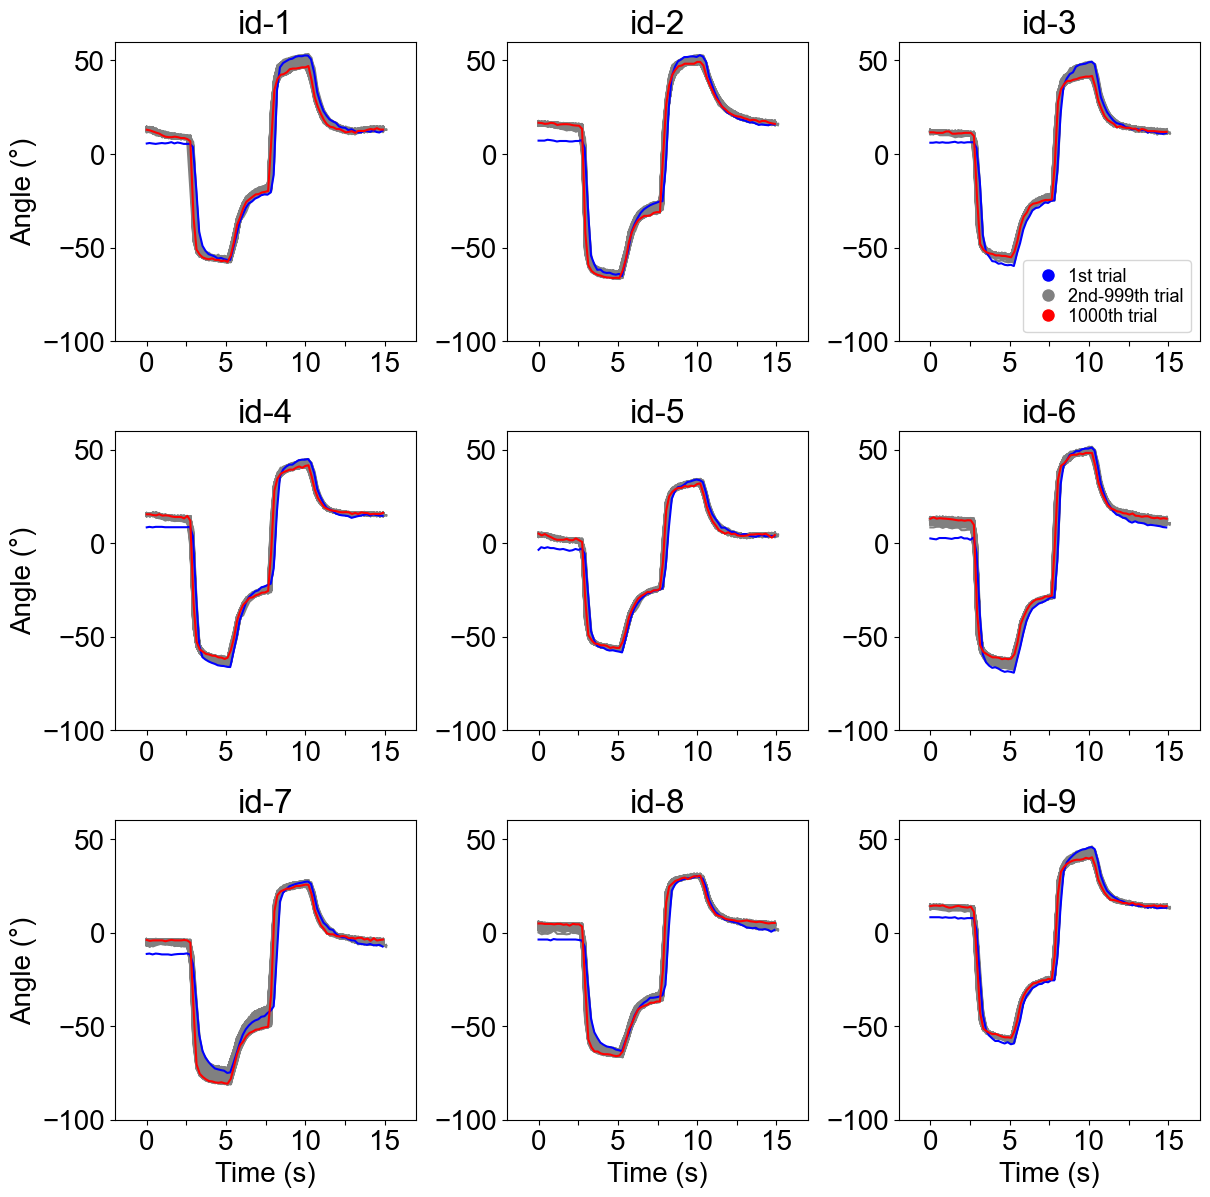

In [47]:
plt.rcParams['font.size'] = fontsize_main
fig, ax_img = plt.subplots()

fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
# fig, ax_angle = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True, gridspec_kw={'wspace': 0.06})
fig_rep, ax_rep = plt.subplots(2, 1, figsize=(10,8))
fig_range, ax_range = plt.subplots(1, 1, figsize=(10,4))
fig_hyst, ax_hyst = plt.subplots(3,3, figsize=(14,14), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
# fig, ax_rep_min = plt.subplots(1, 1, figsize=(8,4))
lines = []

img = mpimg.imread(os.path.join(data_folder, result_name_arr[0], 'processed', 'frame_1000.png'))
ax_img.imshow(img)

angle_over_time = {}
for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    n_cycle = n_cycle_arr[ii]
    r_val = merge_PWM(values_dict['regulator_PWM7'], values_dict['regulator_PWM10'])
    r_time = times_dict['regulator_PWM7']
    
    ax = ax_ori
    # ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')
    
    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)

    for tag_id in range(1, 10, 1):
    # tag_id = 1
        if not tag_id in angle_over_time:
            angle_over_time[tag_id] = {'max': np.array([]), 'min': np.array([])}
    # ax = ax_angle[ii]
    # ax1 = axes[1]
    legend_labels = []
    lines = []
    for tag_id in range(1, 10, 1):
        
        # camera_data_dict['angle_wrt_fixed'][tag_id][camera_data_dict['angle_wrt_fixed'][tag_id] < -120] += 360
        cycle_skip = []
        for i in range(n_cycle):
            start_idx = camera_data_dict['cycle_start_idx'][tag_id][i]
            end_idx = camera_data_dict['cycle_start_idx'][tag_id][i+1]
            cur_t = camera_data_dict['t'][tag_id][start_idx:end_idx] -camera_data_dict['t'][tag_id][start_idx]
            cur_angle = np.copy(camera_data_dict['angle_wrt_horiz'][tag_id][start_idx:end_idx]) - 90
            
            if tag_id < 5:
                cur_angle += 180
            
            angle_over_time[tag_id]['max'] = np.append(angle_over_time[tag_id]['max'], np.max(cur_angle[50:54]) )
            if angle_over_time[tag_id]['max'][-1] < 20 or (tag_id == 2 and angle_over_time[tag_id]['max'][-1] < 40):
                angle_over_time[tag_id]['max'][-1] = angle_over_time[tag_id]['max'][-2] 
                cycle_skip.append(i)
            angle_over_time[tag_id]['min'] = np.append(angle_over_time[tag_id]['min'], np.min(cur_angle[25:29]))
            if angle_over_time[tag_id]['min'][-1] > -50:
                angle_over_time[tag_id]['min'][-1] = angle_over_time[tag_id]['min'][-2] 
                cycle_skip.append(i)
        
        for i in list(range(1, n_cycle-2))+[0, n_cycle-2]:
            if i == 0:
                color = 'blue'
            elif i == n_cycle-2:
                color = 'red'
            else:
                color = 'grey'
            if i != 0 and i != n_cycle - 2 and i in cycle_skip:
                continue
            start_idx = camera_data_dict['cycle_start_idx'][tag_id][i]
            end_idx = camera_data_dict['cycle_start_idx'][tag_id][i+1]
            cur_t = camera_data_dict['t'][tag_id][start_idx:end_idx] -camera_data_dict['t'][tag_id][start_idx]
            # print('time', np.max(cur_t), tag_id)
            cur_angle = np.copy(camera_data_dict['angle_wrt_horiz'][tag_id][start_idx:end_idx]) - 90
            if tag_id < 5:
                cur_angle += 180
            if tag_id == 4 and i == 0:
                print('max', np.argmax(cur_angle), 't', cur_t[np.argmax(cur_angle)])
                print('min', np.argmin(cur_angle), 't', cur_t[np.argmin(cur_angle)])
                
            ax = ax_hyst[(tag_id-1)//3][(tag_id-1)%3]
            line = ax.plot(cur_t*0.98, 
               cur_angle, 
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
            if tag_id == 1:
                lines.append(line)
        print('skip', tag_id, len(cycle_skip))
    for tag_id in angle_over_time:
        plot_idx = np.arange(n_cycle)
        
        angle_t_max = np.copy(angle_over_time[tag_id]['max'])
        angle_t_min = np.copy(angle_over_time[tag_id]['min'])
        
        if tag_id == 5:
            angle_t_min[np.argmax(angle_t_min)] = angle_t_min[np.argmin(angle_t_min) + 1]
        # ax.plot(plot_idx, angle_t_max - angle_t_min , label=f'id-{tag_id}')
        ax_range.plot(plot_idx, angle_t_max - angle_t_min , label=f'id-{tag_id}')
        tmp_range = angle_t_max - angle_t_min
        tmp_range = tmp_range[50:]
        print(tag_id, 'range', tmp_range[0], 'change', np.max(tmp_range) - np.min(tmp_range), 'percentage', (np.max(tmp_range) - np.min(tmp_range)) / tmp_range[0]) 
        ax = ax_rep[0]
        ax.plot(plot_idx, angle_t_max , label=f'id-{tag_id}')
        ax = ax_rep[1]
        ax.plot(plot_idx, angle_t_min , label=f'id-{tag_id}')
        # ax.set_ylim(-140, -160)


    ax_range.set_ylabel('Range of Motion (°)')
    ax_range.set_xlabel('Number of Cycles')
    ax_range.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)


    ax_rep[0].set_ylabel('Angle at (0,172) kPa (°)')
    ax_rep[1].set_ylabel('Angle at (172,0) kPa (°)')
    ax_rep[1].set_xlabel('Number of Cycles')
    ax_rep[0].text(-0.15, 1, 'C', transform=ax_rep[0].transAxes, fontsize=28, va='top', ha='right')
    ax_rep[1].text(-0.15, 1, 'D', transform=ax_rep[1].transAxes, fontsize=28, va='top', ha='right')
# ax_rep[1].set_ylabel('Angle (°) ')
    # ax_rep[2].set_ylabel('  (°)')
    ax_rep[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

for ii, ax_arr in enumerate(ax_hyst):
    for jj, ax in enumerate(ax_arr):
        ax.set_xlim(-2, 17)
        ax.set_xticks([0, 2.5, 5, 7.5, 10, 12.5, 15])
        ax.set_xticklabels(['0', '', '5', '', '10', '', '15'])
        ax.set_ylim(-100, 60)
        ax.set_title(f'id-{ii * 3 + jj + 1}')
        if jj == 0:
            ax.set_ylabel('Angle (°)')
        if ii == 2:
            ax.set_xlabel('Time (s)')

ax = ax_hyst[0][2]
legend_labels = [r'1st trial', r'2nd-999th trial', '1000th trial']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend-1
                          )

fig_range.savefig(os.path.join(figures_dir, 'actuators-rep-range.pdf'), dpi=600, bbox_inches='tight')
fig_rep.savefig(os.path.join(figures_dir, 'actuators-rep-extremes.pdf'), dpi=600, bbox_inches='tight')
fig_hyst.savefig(os.path.join(figures_dir, 'actuators-rep-loops.pdf'), dpi=600, bbox_inches='tight')

# Exp 3-4 (single actuator stiffness)

loading ./data-raw\exp_3_4_20240327/backbone_20_short_mount\tracker.txt


IndexError: index 0 is out of bounds for axis 0 with size 0

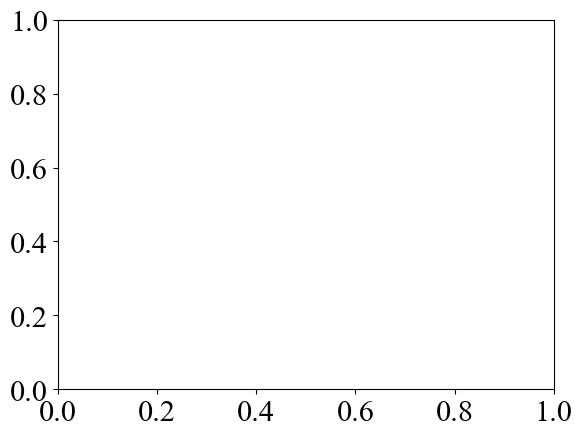

In [274]:
mass_arr = ['a', 'b', 'c', 'd']
def process_csv(data_file, mass_filter=None, skip_header=True):
    print('loading', data_file)
    if skip_header:
        df = pd.read_csv(data_file, skiprows=lambda x: x < 2 if x < 2 else False)
    else:
        df = pd.read_csv(data_file)
        
    df = df.dropna(subset=df.columns.difference(['t']), how='all')

    if not (mass_filter is None):
        rows_to_remove = set()
        # Find rows to remove along with the rows after them
        for index, row in df.iterrows():
            if (not (row['mass'] in mass_filter)) and row['mass']!=0:
                rows_to_remove.add(index)
                # if index + 1 < len(df):
                rows_to_remove.add(index - 1)

    # Drop the rows found
    df = df.drop(rows_to_remove)
    data = {}

    for i, mass in enumerate(mass_arr):
        key = '' if i == 0 else f'.{i}'
        if not ('x'+key in df):
            continue
        
        data[mass] = {
            # 'x': df['x'+key].to_numpy(),
            # 'y': df['y'+key].to_numpy(),
            'pos': np.stack((df['x'+key].to_numpy(),df['y'+key].to_numpy()), axis=-1)
        }
        additional_keys = ['t', 'frame', 'mass']

        if i == 0:
            for k in additional_keys:
                data[mass][k] = df[k].to_numpy()
            
    return data
result_name_arr = [
    # 'exp_3_4_20240327/backbone_0',
    # 'exp_3_4_20240327/backbone_20',
    'exp_3_4_20240327/backbone_20_short_mount',
]

mass_filter_arr = [
    [1.48, 2.65],# 3.8, 5.01],
    [3.8, 5.01, 7.23, 10.0],
]

data_arr = []
for ii, result_name in enumerate(result_name_arr):
    result_file = os.path.join(data_folder, result_name, 'tracker.txt')
    data = process_csv(result_file, mass_filter=mass_filter_arr[ii])
    data_arr.append(data)
    
# print(data_arr[0]['a']['pos'][0],data_arr[1]['a']['pos'][0])
fig, ax_img = plt.subplots()
    
for ii, data in enumerate(data_arr):
    print(data['a']['pos'][0])
    frame_arr = data['a']['frame'].copy()
    mass_arr = data['a']['mass'].copy()
    a_arr = data['a']['pos'].copy() 
    b_arr = data['b']['pos'] - a_arr
    # c_arr = data['c']['pos'] - a_arr
    # d_arr = data['d']['pos'] - a_arr
    a_arr -= a_arr


    ax = ax_img
    # ax.scatter(a_arr[:, 0], a_arr[:, 1])
    ax.scatter(b_arr[:, 0], b_arr[:, 1], label=f'{ii}')

    ax.scatter([0], [0])
    ax.axis('equal')

    xc, yc, r, sigma, angles = circle_fit(b_arr)
    plot_circle_arc(ax, np.array([xc, yc]), r, np.min(angles), np.max(angles))
    ax.scatter([xc], [yc], label=f'{ii}-center')
    # ax.legend()
    print('angles range', np.max(angles) - np.min(angles))
    data_by_mass = {}

    est_angle_arr = np.arctan2((d_arr-c_arr)[:, 1], (d_arr-c_arr)[:, 0])

    dtheta_arr = []
    force_arr = []

    force_data_dict = {
        'force': {},
        'dtheta': {}
    }
    for i in range(0, a_arr.shape[0], 2):
        dtheta = angles[i+1] - angles[i]
        force = mass * 9.81 * np.abs(np.cos(dtheta))
        # dtheta = est_angle_arr[i+1] - est_angle_arr[i]
        mass = mass_arr[i+1]
        # force_arr.append(mass * 9.81)
        force_arr.append(force)
        dtheta_arr.append(dtheta)
        if not (mass in force_data_dict['force']):
            force_data_dict['force'][mass] = []
            force_data_dict['dtheta'][mass] = []
        force_data_dict['force'][mass].append(force)
        force_data_dict['dtheta'][mass].append(dtheta)
    
    dtheta_arr = np.array(dtheta_arr)
    force_arr = np.array(force_arr)
    print(dtheta_arr.shape, force_arr.shape)

    print('dtheta mean', np.mean(dtheta_arr))
    # print(force_arr)
    print(np.mean(force_arr * r / dtheta_arr))


    for k in force_data_dict:
        for m in force_data_dict[k]:
            force_data_dict[k][m] = np.array(force_data_dict[k][m])
    for m in sorted(force_data_dict['force']):
        print('mass', m, 'stiffness', np.mean(force_data_dict['force'][m] * r / force_data_dict['dtheta'][m])) 

# *Exp 4-1 (block manipulation)

In [5]:
result_name = 'exp_4_1_20240225_17-58-42' # base joint actuator
result_folder = os.path.join(data_folder, result_name)

values_dict, times_dict, camera_dict, camera_data_dict, camera_scale = default_data_prep(result_folder, ids=[0, 1])

found prior buffer, loading from ./data-raw\exp_4_1_20240225_17-58-42\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_4_1_20240225_17-58-42\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_4_1_20240225_17-58-42\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_0', 'camera_1', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'info_CYCLE_DONE', 'camera_37', 'camera_17']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])


## Figures

176.03128051757812 -118.22108459472656
13363 16219


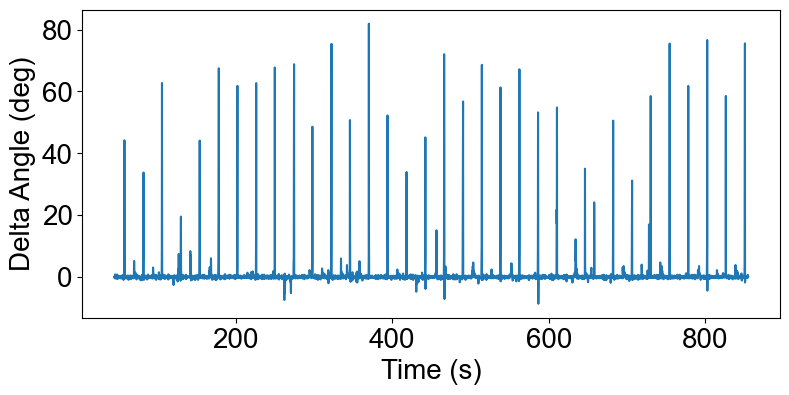

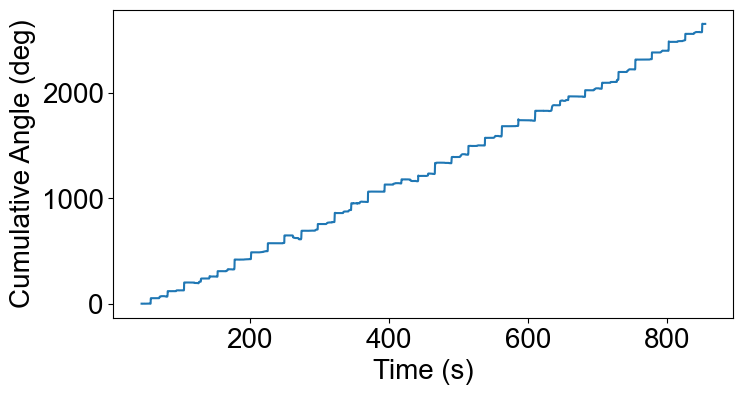

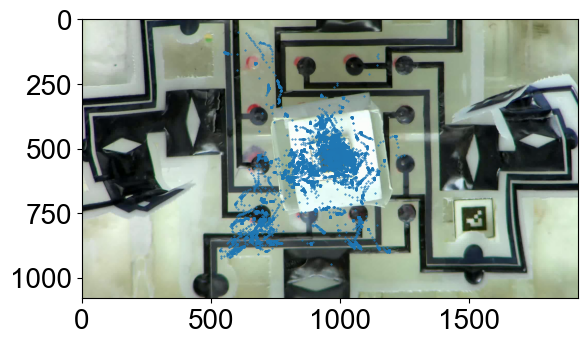

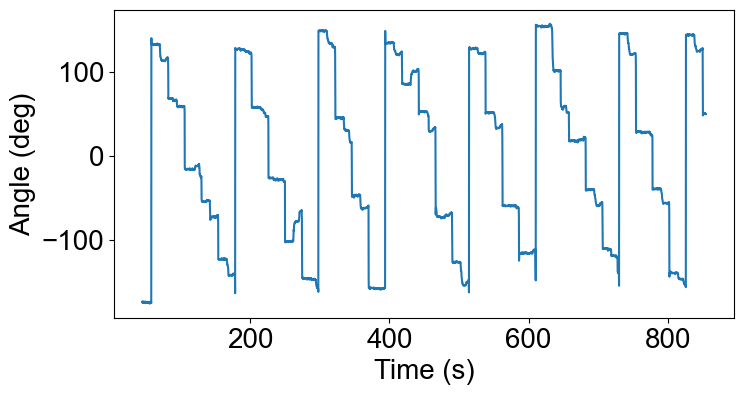

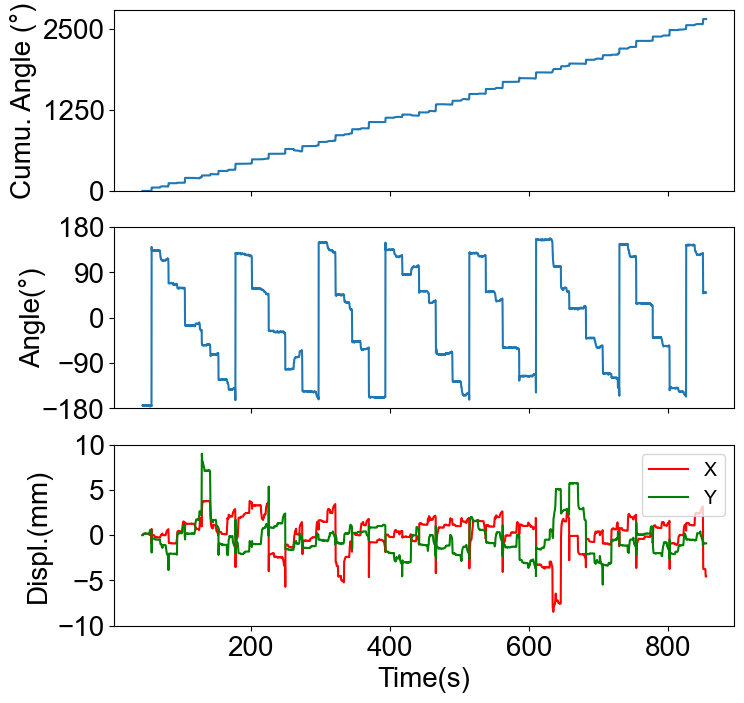

In [6]:
plt.rcParams['font.size'] = fontsize_main
angles_delta = []
angles_cumu = [0]
total_angle = 0
for i, _ in enumerate(camera_data_dict['t'][1]):
    if i == 0:
        angles_delta.append(0)
        continue
    cur_corners = camera_data_dict['corners'][1][i]
    prev_corners = camera_data_dict['corners'][1][i-1]
    delta = cmp_corners(prev_corners, cur_corners)['rot']
    angles_delta.append(delta)
    total_angle += delta
    angles_cumu.append(total_angle)

angles_delta = np.array(angles_delta)
angles_cumu = np.array(angles_cumu)
print(np.max(angles_delta), np.min(angles_delta))
print(np.argmax(angles_delta), np.argmin(angles_delta))
idx = np.where(camera_data_dict['t'][1] > 855)[0][0]

fig, ax = plt.subplots(1, 1, figsize=(9,4))
ax.plot(camera_data_dict['t'][1][:idx],  angles_delta[:idx], linestyle='-')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Delta Angle (deg)')

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(camera_data_dict['t'][1][:idx],  angles_cumu[:idx], linestyle='-')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Cumulative Angle (deg)')


img = mpimg.imread(os.path.join(result_folder, 'processed', 'frame_1.png'))
fig, ax = plt.subplots()
ax.imshow(img)
ax.scatter(camera_data_dict['centroid'][1][:, 0],camera_data_dict['centroid'][1][:, 1], s=0.2)


fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(camera_data_dict['t'][1][:idx], -1*(camera_data_dict['rot'][1])[:idx], linestyle='-')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (deg)')

fig, axes = plt.subplots(3, 1, figsize=(8,8), sharex=True,gridspec_kw={'hspace': 0.2})

ax = axes[0]
ax.plot(camera_data_dict['t'][1][:idx],  angles_cumu[:idx], linestyle='-')
ax.set_ylabel('Cumu. Angle (°)')
ax.set_ylim(0, 2800)
ax.set_yticks([0, 1250, 2500])

ax = axes[1]
ax.set_ylabel('Angle(°)', labelpad=-3)
ax.set_yticks([-180, -90, 0, 90, 180])
ax.set_ylim(-180, 180)
ax.plot(camera_data_dict['t'][1][:idx], -1*(camera_data_dict['rot'][1])[:idx], linestyle='-')
ax.tick_params(axis='both', which='major')

ax = axes[2]
ax.plot(camera_data_dict['t'][1][:idx], (camera_data_dict['centroid'][1][:idx, 0]-camera_data_dict['centroid'][1][0, 0])*camera_scale[:idx], color='red', linestyle='-', label='X')
ax.plot(camera_data_dict['t'][1][:idx], (camera_data_dict['centroid'][1][:idx, 1]-camera_data_dict['centroid'][1][0, 1])*camera_scale[:idx], color='green',linestyle='-', label='Y')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Displ.(mm)')
ax.set_yticks([-10, -5, 0, 5, 10])
ax.legend(loc='upper right', fontsize=fontsize_legend)

ax.tick_params(axis='both', which='major') 
plt.savefig(os.path.join(figures_dir, 'cube-tracking.pdf'), dpi=600, bbox_inches = 'tight')
plt.show()

# Exp 4-3 (Gripping force)
## Prep data

In [119]:

result_name_arr = [
    # 'exp_4_2_20240308_17-06-27', # 0.5mil * 0.7cm * 8.5cm, 10 trials
    # 'exp_4_2_20240308_18-22-41_1mil_again_smooth_2', # 1 mil *0.7cm * 8.5cm, 5 trials
    # 'exp_4_2_20240312_18-09-14_1mil_free_5psi',
    'exp_4_2_20240313_10-14-40_1mil_free_5psi', # 17mm circumference, 0.7mm width, 1mil thick
    'exp_4_2_20240312_18-22-50_1mil_short_free_5psi', # 12mm circumference, 0.7mm width, 1mil thick
    'exp_4_2_20240312_18-34-01_2mil_free_5psi' # 17mm circumference, 0.7mm width, 2mil thick
]

n_cycle_arr = [5,
               5,5]

spring_data_folder = os.path.join(data_folder, 'spring_20240313')
spring_data_name = [
    '1mil.txt',
    '1mil_short.txt',
    '2mil.txt'
]
spring_data = []

import pandas as pd
def process_spring_data(data_file):
    df = pd.read_csv(data_file)
    x_a = df['x_a'].to_numpy()
    y_a = df['y_a'].to_numpy()
    f = df['Force'].to_numpy()
    x_b = df['x_b'].to_numpy()
    y_b = df['y_b'].to_numpy()

    return {
        'y': (x_a-x_b)*1000,
        'x': (y_a-y_b)*1000,
        'f': f
    }
for data_name in spring_data_name:
    spring_data.append(process_spring_data(os.path.join(spring_data_folder, data_name)))

print(spring_data)


ids=[1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, result_name_arr, ids)

[{'y': array([6.81749, 6.74431, 6.88442, 6.96491, 7.02212, 6.95205, 6.93083,
       6.98572]), 'x': array([29.68928, 24.29968, 19.81444, 15.16572, 11.34609,  8.35598,
       13.29411,  4.64596]), 'f': array([0.   , 0.006, 0.01 , 0.016, 0.018, 0.02 , 0.016, 0.022])}, {'y': array([-1.49012, -0.64292, -0.39188, -0.3114 , -0.67393, -0.65982,
       -2.19045]), 'x': array([27.94467, 23.99788, 18.90125, 16.50791, 22.76371, 27.358  ,
       25.3567 ]), 'f': array([0.   , 0.018, 0.036, 0.04 , 0.022, 0.002, 0.012])}, {'y': array([3.45364, 3.66345, 3.82529, 3.71504, 3.68337, 3.58934, 3.59165,
       3.59818, 3.48888]), 'x': array([26.24953, 22.71389, 19.42067, 20.77341, 21.41086, 22.8304 ,
       23.74043, 24.63726, 26.26546]), 'f': array([0.   , 0.03 , 0.054, 0.042, 0.038, 0.028, 0.02 , 0.012, 0.002])}]
found prior buffer, loading from ./data-raw\exp_4_2_20240313_10-14-40_1mil_free_5psi\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./dat

## Figures

n cycle 5 cycle len 60
16.239915352609106 0.013956229700496104 0
13.934703272372605 0.015555562792708772 0
n cycle 5 cycle len 60
1
2
22.17652660537835 0.0263065886716014 1
21.03857564082917 0.031496405551112404 1
n cycle 5 cycle len 60
1
2
22.690643310546875 0.03019724878200092 2
21.89654803171127 0.036935168469827785 2
[18.987151090503602, 17.04981970617851, 23.98567701221953, 23.44757652282715, 23.82867951275449, 23.38524216691223]
[0.012050225014249108, 0.013394326157956205, 0.01805565377941275, 0.020509751618178647, 0.020540981156838726, 0.024303558900972112]
[17.849001883507597, 15.380054110918069, 23.29277992248535, 22.288337229412814, 23.344201103095443, 22.693730726251967]
[0.012839861554084337, 0.014552792832512339, 0.021215727564745945, 0.025796657504090492, 0.024651793425557095, 0.030171051977135953]
[16.57676887512207, 14.246002052939241, 22.44930731187414, 21.272279739379883, 22.859602333037202, 22.01674461364746]
[0.0137225240946639, 0.015339586811325492, 0.0250625263533

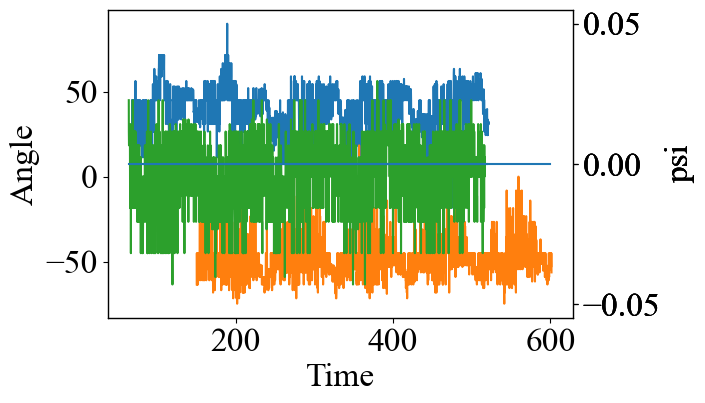

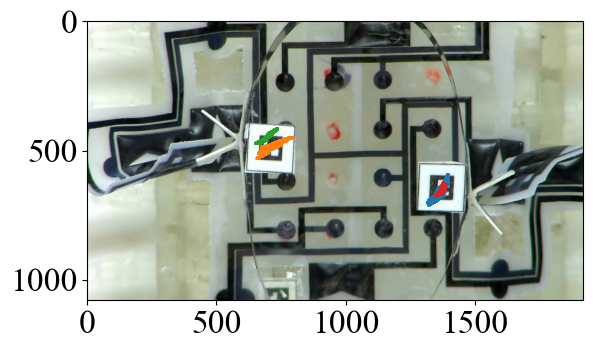

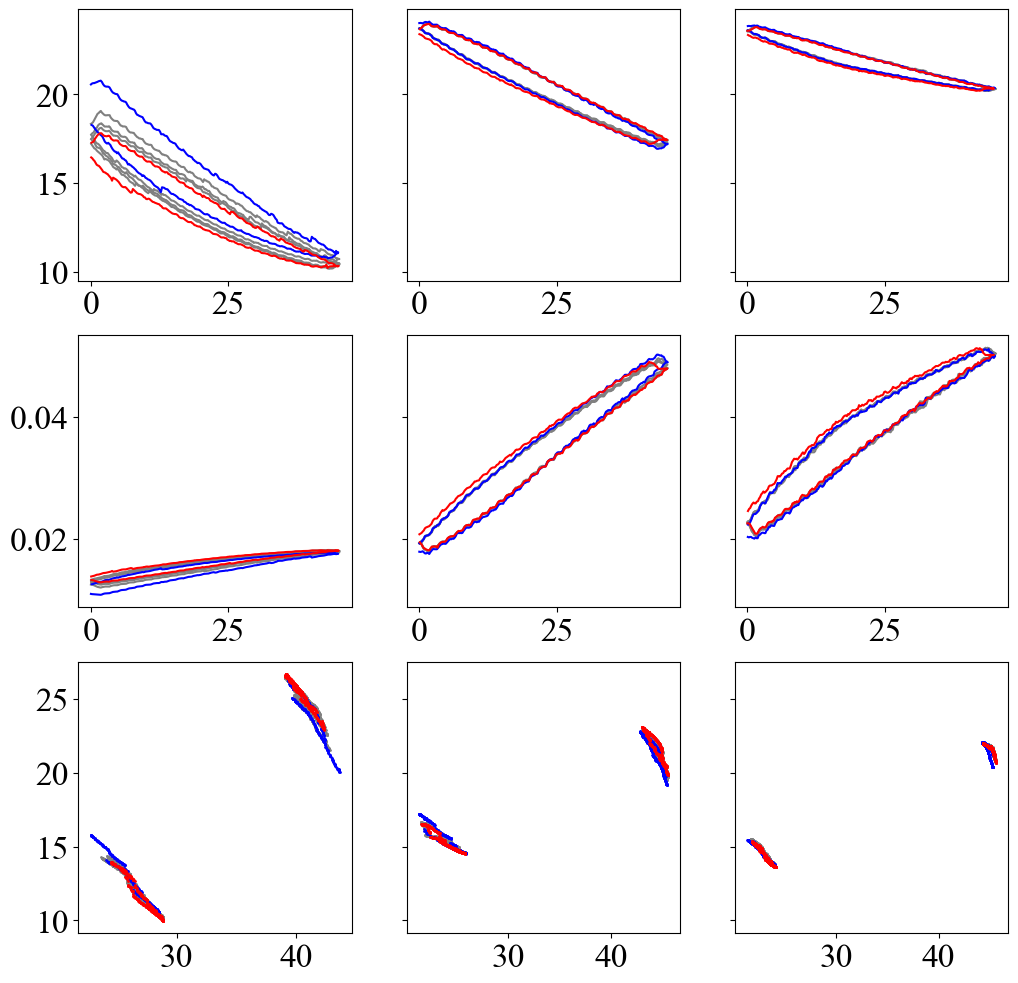

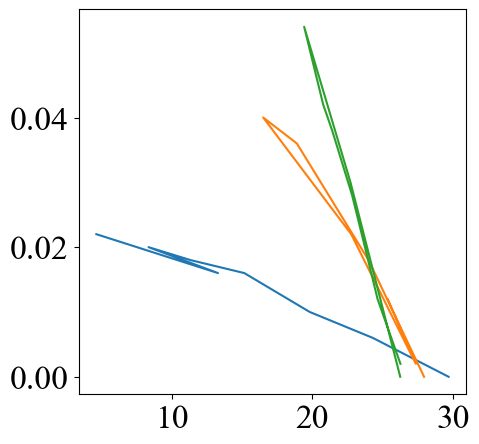

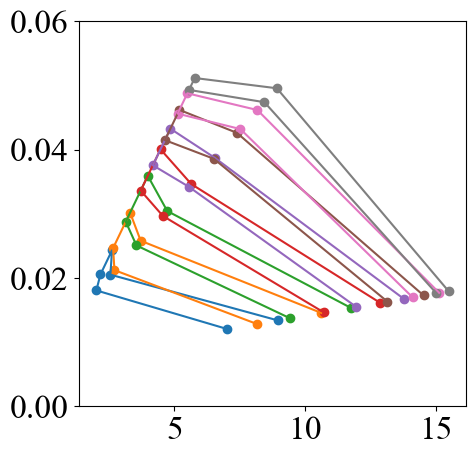

In [146]:
plt.rcParams['font.size'] = 20
use_x = True

lines = []
lines_circle = []
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_img = plt.subplots()
fig, ax_angle = plt.subplots(3, 3, figsize=(12,12), 
                             sharey='row', 
                             # gridspec_kw={'wspace': 0.06, 'hspace': 0.4}
                            )
fig, ax_spring = plt.subplots(1, 1, figsize=(5, 5))
fig, ax_force = plt.subplots(1, 1, figsize=(5, 5))
f_data = {}

img = mpimg.imread(os.path.join(data_folder, result_name_arr[1], 'processed', 'frame_1000.png'))
ax_img.imshow(img)

for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    n_cycle = n_cycle_arr[ii]
    
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    ax = ax_ori
    ax.plot(camera_data_dict['t'][1], camera_data_dict['rot'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')
 
    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)

    if ii != 0:
        ax = ax_img
        for j in [1, 2]:
            ax.scatter(
                camera_data_dict['centroid'][j][:, 0], 
                camera_data_dict['centroid'][j][:, 1], 
                linestyle='-',
                s=1
            )
            print(j)
    

    tag_dist_arr = []
    for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-1:
            color = 'red'
        else:
            color = 'grey'
            
        ax = ax_angle[0][ii]    
        # if i != 0:
            # continue
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        if use_x:
            cur_len = (camera_data_dict['centroid'][1][start_idx:end_idx]-camera_data_dict['centroid'][2][start_idx:end_idx])[:, 0]*camera_scale[0]
            if ii in [0, 2]:
                cur_len *=-1
        else:
            cur_len = np.linalg.norm(camera_data_dict['centroid'][1][start_idx:end_idx]-camera_data_dict['centroid'][2][start_idx:end_idx], axis=-1)*camera_scale[0]
        tag_dist_arr.append(np.copy(cur_len))
        cur_force = interp_extrapolate(cur_len, spring_data[ii]['x'], spring_data[ii]['f'])
        line = ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
                cur_len,
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        
        if ii == 2:
            lines.append(line)

        ax = ax_angle[1][ii]
        line = ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
            cur_force,
            linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        
        ax = ax_angle[2][ii]
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        for j in [1, 2]:
            ax.scatter(
                camera_data_dict['disp'][j][start_idx:end_idx, 0]*camera_scale[0],
                camera_data_dict['disp'][j][start_idx:end_idx, 1]*camera_scale[0],
                linestyle='-',
                label=f'Trial {i+1}',
                s=1,
                color=color
            )

    # force data compile
    cycle_i = 1 # which cycle to use
    start_idx = camera_data_dict['cycle_start_idx'][1][cycle_i]
    end_idx = camera_data_dict['cycle_start_idx'][1][cycle_i+1]
    value_PWM, time_PWM = values_dict['regulator_PWM4'][:cycle_len], times_dict['regulator_PWM4'][:cycle_len]
    time_PWM = time_PWM - time_PWM[0]
    tag_dist_interp = np.interp(time_PWM, camera_data_dict['t'][1][start_idx:end_idx]-camera_data_dict['t'][1][start_idx], tag_dist_arr[0])


    # convert tag dist to force
    if use_x:
        force_interp = interp_extrapolate(tag_dist_interp, spring_data[ii]['x'], spring_data[ii]['f'])
    else:
        spring_dist = np.sqrt(np.array(spring_data[ii]['x'])**2 + np.array(spring_data[ii]['y'])**2)
        force_interp = interp_extrapolate(tag_dist_interp, spring_dist, spring_data[ii]['f'])                             
    
    for j, pwm in enumerate(value_PWM):
        if not (pwm in f_data):
            f_data[pwm] = {
                'dist': [],
                'f': []
            }
        f_data[pwm]['dist'].append(tag_dist_interp[j])
        
        #convert tag dist to force
        f_data[pwm]['f'].append(force_interp[j])

        if pwm == 10:
            print(tag_dist_interp[j], force_interp[j], ii)

ax = ax_spring

for i, s in enumerate(spring_data):
    ax.plot(s['x'],
            s['f'],
            linestyle='-',
            label=f'{i}')
    


ax = ax_force
plot_idx = [0, 2, 4, 5, 3, 1]
for i, pwm in enumerate(np.arange(5.5, 20, 2)):


# for i, pwm in enumerate([5.5, 10.5, 15.5, 19.5]):
    print(f_data[pwm]['dist'])
    print(f_data[pwm]['f'])
    ax.plot(26-np.array(f_data[pwm]['dist'])[plot_idx], 
            np.array(f_data[pwm]['f'])[plot_idx],
            linestyle='-',
            label=f'{pwm}')
    ax.scatter(26-np.array(f_data[pwm]['dist'])[plot_idx], 
            np.array(f_data[pwm]['f'])[plot_idx],
            label=f'{pwm}')
ax.set_ylim([0, 0.06])
# ax.legend()
psi = [0, 68.9, 137.8]
# for i, ax in enumerate(ax_angle[0]):
#     # ax.set_ylim(-130, 50)
#     # ax.set_yticks([-100, -50, 0, 50])
#     # ax.set_xlim(-20, np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])*1.1)
#     #map tmime to pressure
#     # ax.set_xticks([map_range(tmp, -25, 25, 
#                              # np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]), 
#                              # np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])) for tmp in [-25, -12.5, 0, 12.5, 25]])
#     # ax.set_xticklabels(['-172', '', '0', '', '172'])
    
#     # ax.set_title(f'{psi[i]} kPa', fontsize='24')
#     # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
#     if i == 0:
#         ax.set_ylabel('Angle (°)', )
#     if i == 1:
#         ax.set_xlabel('Pressure (kPa)', )
#     if i == 2:
#         legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
#         legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
#         legend = ax.legend(legend_handles, legend_labels, ncol=1, 
#                            labelspacing=0.1, 
#                            columnspacing =0.05,
#                            loc='upper right', 
#                            handletextpad=0.1, 
#                            fontsize=fontsize_legend,
#                           )

# for i, ax in enumerate(ax_angle[1]):
#     ax.set_xlim(-6, 8)
#     ax.set_xticks([-5, -2.5, 0, 2.5, 5, 7.5])
#     ax.set_xticklabels(['-5', '', '0', '', '', '7.5',])
#     ax.set_ylim(-6, 8)
#     ax.set_yticks([-5, -2.5, 0, 2.5, 5, 7.5])
#     ax.set_yticklabels(['-5', '', '0', '', '', '7.5',])
#     ax.axis('equal')
#     # ax.set_aspect('equal')
#     if i == 0:
#         ax.set_ylabel('Displacement-Y (mm)', )
#     if i == 2:
#         ax.legend(handles=[lines_circle[i][0]], labels=['Fitted circular arc'], fontsize=fontsize_legend,)
#     if i == 1:
#         ax.set_xlabel('Displacement-X (mm)', )

# fig.text(0.06, 0.5, , va='center', rotation='vertical')
# plt.tight_layout()

# plt.savefig(os.path.join(figures_dir, 'gripping-force.pdf'), dpi=600)
plt.show()

# Exp 4-4 (Turning force)

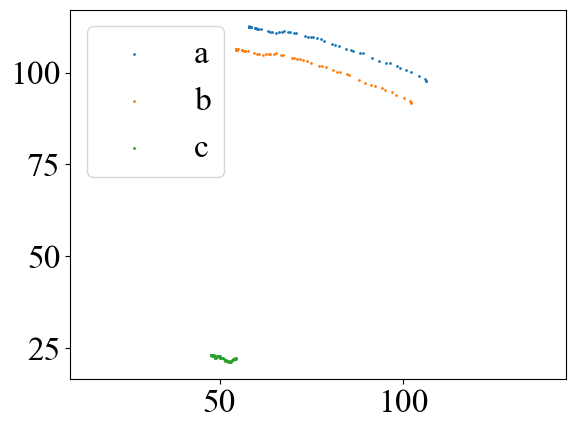

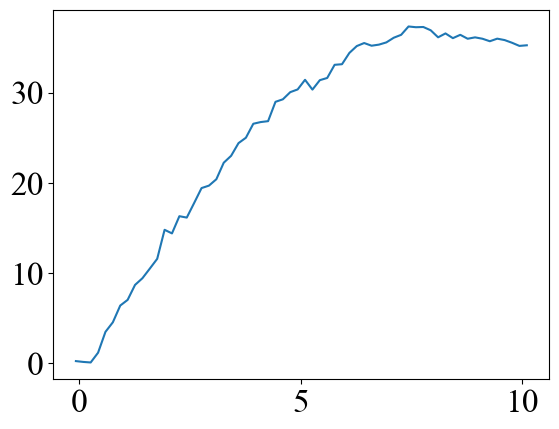

In [158]:
import pandas as pd
results_file = './data-raw/beamdata.txt'
df = pd.read_csv(results_file)
t = df['t'].to_numpy()
xa = df['x_a'].to_numpy()
ya = df['y_a'].to_numpy()
xb = df['x_b'].to_numpy()
yb = df['y_b'].to_numpy()
xc = df['x_c'].to_numpy()
yc = df['y_c'].to_numpy()

fig, ax_img = plt.subplots()
ax = ax_img
ax.scatter(x_a, y_a, s=1, label='a')
ax.scatter(x_b, y_b, s=1, label='b')
ax.scatter(x_c, y_c, s=1, label='c')
ax.axis('equal')
ax.legend()

def distance_to_line(A, B, C):
    A = np.array(A)
    B = np.array(B)
    C = np.array(C)
    
    # Vector AB and AC
    AB = B - A
    AC = C - A
    
    # Area of parallelogram is |AB x AC|
    # In 2D, this is |AB_x*AC_y - AB_y*AC_x|
    area = np.abs(AB[0] * AC[1] - AB[1] * AC[0])
    
    # Length of the base (AB)
    AB_length = np.linalg.norm(AB)
    
    # Distance is area of parallelogram divided by length of base
    distance = area / AB_length
    
    return distance

fig, ax_disp = plt.subplots()
ax = ax_disp

disp = []
for xa, ya, xb, yb, xc, yc in zip(xa, ya, xb, yb, xc, yc):
    disp.append(distance_to_line([xa, ya], [xb, yb], [xc, yc]))
ax.plot(t,disp) 

In [136]:
import pandas as pd
import numpy as np
data_file_arr = [
    'exp_4_4_20240314_cantilever_again/25_neg.txt',
    'exp_4_4_20240314_cantilever_again/25_pos.txt',
#     'exp_4_4_20240314_cantilever_again/beamdata.txt'
                ]

mass_arr = ['a', 'b', 'c', 'd']
def process_csv(data_file, skip_header=True):
    
    if skip_header:
        df = pd.read_csv(data_file, skiprows=lambda x: x < 2 if x < 2 else False)
    else:
        df = pd.read_csv(data_file)
        
    df = df.dropna(subset=df.columns.difference(['t']), how='all')
    
#     print(df)
    data = {}
    
    for i, mass in enumerate(mass_arr):

        key = '' if i == 0 else f'.{i}'
        data[mass] = {
            'x': df['x'+key].to_numpy(),
            'y': df['y'+key].to_numpy(),
        }
        if i == 0:
            data[mass]['t'] = df['t'].to_numpy()
            
    return data

data_arr = []
for i, data_file in enumerate(data_file_arr):
    print(data_file)
    if i == 2:
        data_arr.append(process_csv(data_file, False))
    else:
        data_arr.append(process_csv(data_file))
  
    
fig, ax_img = plt.subplots()
ax = ax_img

for data in data_arr:
#     ax.scatter(data['a']['x'], data['a']['y'], s=1, label='a')
#     ax.scatter(data['b']['x'], data['b']['y'], s=1, label='b')
    ax.scatter(data['c']['x'], data['c']['y'], s=1, label='c')
#     ax.scatter(data['d']['x'], data['d']['y'], s=1, label='d')
    
ax.axis('equal')
ax.legend()

def distance_to_line(Ax, Ay, Bx, By, Cx, Cy):
    # Vector AB and AC
    ABx = Bx - Ax
    ABy = By - Ay
    ACx = Cx - Ax
    ACy = Cy - Ay

    # Area of parallelogram is |AB x AC|
    # In 2D, this is |AB_x*AC_y - AB_y*AC_x|
    area = np.abs(ABx * ACy - ABy * ACx)

    # Length of the base (AB)
    AB_length = np.sqrt(ABx**2 + ABy**2)

    # Distance is area of parallelogram divided by length of base
    distance = area / AB_length

    return distance
fig, ax_disp = plt.subplots()
ax = ax_disp

disp_arr = []

for i, data in enumerate(data_arr):
    t = data['a']['t']
    disp = distance_to_line(data['a']['x'], 
                            data['a']['y'],
                            data['b']['x'], 
                            data['b']['y'],
                            data['c']['x'], 
                            data['c']['y'],
                           )
    disp_arr.append(disp)
    ax.plot(t,disp, label=f'{i}') 
ax.legend()

fig, ax_xy = plt.subplots()
ax = ax_xy
for i, data in enumerate(data_arr):
    if i == 1:
        continue
    scatter = ax.scatter(data['d']['x'], data['d']['y'], c=disp_arr[i], cmap='Greys', s=100, alpha=0.75)
ax.axis('equal')
plt.colorbar(scatter, ax=ax, label='Disp')



exp_4_4_20240314_cantilever_again/25_neg.txt


FileNotFoundError: [Errno 2] No such file or directory: 'exp_4_4_20240314_cantilever_again/25_neg.txt'

# *Exp 6 (plank stiffness)

In [8]:
def plot_and_calculate_stiffness(displacements, forces, plot_flag=True, ax=None):
    if plot_flag:
        if ax is None:
            fig, ax = plt.subplots()

        # Convert lists to numpy arrays
        displacements = np.array(displacements)
        forces = np.array(forces)

        # Plot the measured data
        ax.scatter(displacements, forces, label='Measured Data')
        ax.set_xlabel('Displacement')
        ax.set_ylabel('Force')
        ax.set_title('Measured Displacements vs. Forces')

    # Perform linear regression to calculate the spring stiffness
    slope, intercept = np.polyfit(displacements, forces, 1)

    if plot_flag:
        # Plot the fitted line
        ax.plot(displacements, slope*displacements + intercept, color='red', label='Fitted Line')

        # Show legend
        ax.legend()

        # Show plot
        ax.grid(True)

    # Calculate spring stiffness (slope of the fitted line)
    spring_stiffness = slope
    print('slope', spring_stiffness)
    if plot_flag:
        return ax, spring_stiffness
    else:
        return spring_stiffness

result_folder = './data-raw/force'
pickle_filename = 'cardboard_20240430_10-22-21.pkl' # Replace with your actual filename
# intervals = [[0, 60], [60, 123], [123, 180]]

# pickle_filename = 'inflated_20_20240502_14-37-09.pkl' # Replace with your actual filename
# pickle_filename = 'inflated_20_20240429_13-36-59.pkl' # Replace with your actual filename
# intervals = [[0, 60], [70, 120], [125, 180]]
    
# pickle_filename = 'uninflated_20240429_10-55-29.pkl' # Replace with your actual filename
# intervals = [[0, 100], [100, 200], [200, 300], [300, 400], [600, 700]]

pickle_filename_arr = [
    
]

NameError: name 'intervals' is not defined

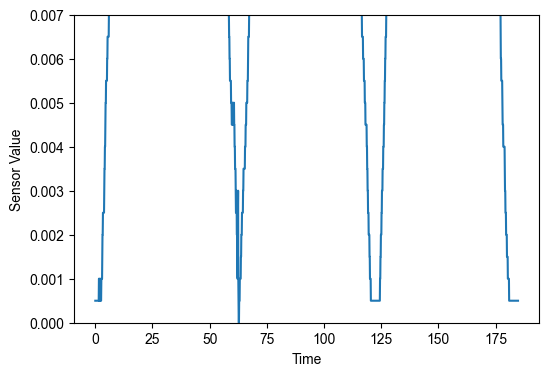

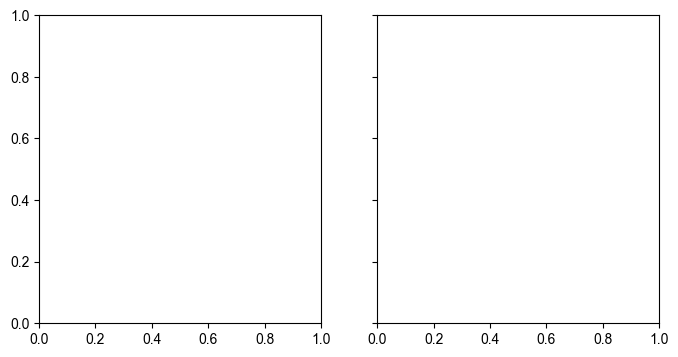

In [11]:
pickle_dir = os.path.join(result_folder, pickle_filename)
with open(pickle_dir, 'rb') as f:
    data = pickle.load(f)
data = np.array(data)
times = data[:, 0]
sensor_values = data[:, 1]

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_ylim(0, 0.007)
ax.plot(times, sensor_values)
ax.set_xlabel('Time')
ax.set_ylabel('Sensor Value')

fig, ax_k = plt.subplots(1, 2, figsize=(8,4),sharey=True,sharex=True)


inc_stiffness = []
dec_stiffness = []
all_inc_arr = []
all_dec_arr = []
for t_min, t_max in intervals:
    inc_arr = []
    dec_arr = []

    cur_limit = 0
    init_flag = False
    last_t = None
    for t, val in zip(times, sensor_values):
        if t > t_min and not init_flag:
            cur_limit = val
            init_flag = True
            # print(cur_limit)
        if t < t_min or t>t_max:
            continue
        if t < (t_min+t_max) * 1./2:
            if val > cur_limit and init_flag:
                inc_arr.append([t, val])
                cur_limit += 0.0005     
                # print(inc_arr)
        else:
            if val < cur_limit and init_flag:
                dec_arr.append([t, val])
                cur_limit -= 0.0005
    inc_arr = np.array(inc_arr)
    dec_arr = np.array(dec_arr)
    
    
    inc_arr[:, 0] -= inc_arr[0, 0]
    dec_arr[:, 0] -= dec_arr[0, 0]
    all_inc_arr.append(inc_arr)
    all_dec_arr.append(dec_arr)
    # inc_stiffness.append(plot_and_calculate_stiffness(inc_arr[:, 0] * 10, inc_arr[:, 1] * 1e6, plot_flag=False))
    # dec_stiffness.append(plot_and_calculate_stiffness(dec_arr[:, 0] * 10, dec_arr[:, 1] * 1e6, plot_flag=False))
    
for i, inc_arr in enumerate(all_inc_arr):
    ax_k[0].scatter(inc_arr[:, 0]*10, inc_arr[:, 1]*1000, label=f'{i}')
for i, dec_arr in enumerate(all_dec_arr):
    ax_k[1].scatter(dec_arr[:, 0]*10, dec_arr[:, 1]*1000, label=f'{i}')

ax_k[1].legend()
ax_k[1].set_xlabel('Disp. (um)')
ax_k[0].set_xlabel('Disp. (um)')
ax_k[0].set_ylabel('Force (mN)')

# Exp 7 (Tensile LDPE test)

C:\Users\harry\AppData\Local\Temp\ipykernel_9320\1681103039.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cycle, group in df.groupby('cycle'):


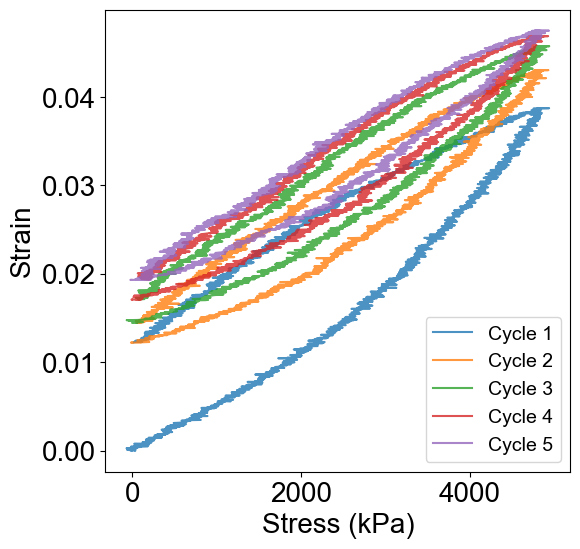

In [28]:
def convert_force_to_stress(force):
    # Constants
    width_in_inches = 1  # Width in inches
    thickness_in_microns = 360  # Thickness in microns
    
    # Convert dimensions to meters
    width_in_meters = width_in_inches * 0.0254  # 1 inch = 0.0254 meters
    thickness_in_meters = thickness_in_microns * 1e-6  # 1 micron = 1e-6 meters
    
    # Calculate cross-sectional area in square meters
    area = width_in_meters * thickness_in_meters
    
    # Calculate stress (force/area)
    stress = force / area  # Stress in Pascals (N/m^2)
    
    return stress

plt.rcParams['font.size'] = fontsize_main
import os
import numpy as np
data_dir = os.path.join('data-raw', 'TensileTest99', 'rawdata/Specimen_RawData_1.csv')

# import matplotlib.pyplot as plt
import pandas as pd
skip_rows = 7
df = pd.read_csv(data_dir, skiprows=skip_rows)

df['cycle'] = pd.cut(df['Total cycle count'], bins=[-0.1, 0.5, 1.5, 2.5, 3.5, 4.5], labels=[1, 2, 3, 4, 5])

sample_length = 25.4 * 3 # 3 inches
# Plot strain vs load, with color based on the cycle
fig, ax = plt.subplots(1, 1, figsize=(6,6))
# ax.plot(times, sensor_values)
data_export = []
for cycle, group in df.groupby('cycle'):
    extension = group['Extension'].to_numpy()
    extension = extension.astype(np.float64) / sample_length
    
    load = group['Load'].to_numpy()
    load = load.astype(np.float64)
    load = convert_force_to_stress(load)/1000
    ax.plot(load, extension, label=f'Cycle {cycle}', alpha=0.8)
    data_export.append({'Stress': load, 'Strain': extension})

for j in range(len(data_export)):
    df = pd.DataFrame(data_export[j])
    df.to_csv(f'data_export/instron/stress_strain_{j}.csv', index=False)
        

ax.set_xlabel('Stress (kPa)')
ax.set_ylabel('Strain')
ax.legend(fontsize=fontsize_legend,loc='lower right',)
# print(specimen1)
plt.savefig(os.path.join(figures_dir, 'instron-test-LDPE.pdf'), dpi=600, bbox_inches='tight')
plt.show()
                        

# Exp 8-1 (Force-diamond)


In [ ]:
data_folder = '

In [ ]:
ForceScale = 0.079  #mN/mV
ForceScaleUp = 0.079-.01 # (increasing pressure)
ForceScaleDown = 0.079 + 0.01 # (decresasing pressure)


###################################
def getDatatFromFile(filename):
    # Read in the file
    f = open(filename)
    lines = f.readlines()  # returns list of lines
    f.close()
    linesFilter = []   # remove comment lines
    for textLine in lines:
        data = textLine.split(',')  # split on comma
        firstChar = data[0].split()
        if (firstChar[0] == '#'):
            continue
        else :
            linesFilter.append(textLine)
    rows=len(linesFilter)-1  # considering first two header lines 
    print('rows=%s,columns=%s' %(rows, columns))
    temp = "".join(linesFilter[1:]).replace('\n',',') # remove line feeds to make single comma separated string
    temp1 = temp[:-1].split(',') # create array of strings for all elements 
    temp2 = list(map(float,temp1)) # convert list of strings to list of floats
    data = np.reshape(temp2,(rows,columns)) 
    return data[:,0], data[:,1]  # gtime, pressure sensor
     
    
xtickspace = np.arange(-200,190, 50)
limits = np.array([-5,200,-2,45])
ytickspace = np.arange(0,50,10)

# set up every plot the same
def setAxes():
    plot.xticks(fontsize=24)
    plot.xticks(xtickspace)
    plot.yticks(fontsize=24)
    plot.yticks(ytickspace)
    plot.axis(limits)
    
    

###################################


fig = plot.figure(figsize=(6,8))
plot.subplot(2,1,1)
setAxes()
plot.ylabel('Force (mN)', fontsize=28)
#plot.title('Top Pouch', size=16)  
plot.arrow(50,22,50,8,width=0.5,head_length=10)  #x,y, dx,dy

plot.subplot(2,1,2)
setAxes()

#plot.arrow(100,30,-50,-8,width=0.5,head_length=10)  #x,y, dx,dy
plot.ylabel('Force (mN)', fontsize=28)
plot.xlabel('Pressure (kPa)', fontsize=28)

legend_label=np.array(np.zeros(4), dtype=str) # initialize blank array for legend

fileList = os.listdir()
legend_label = []
for name in fileList:
    if( name[0:17] == 'force_diamond_top'):
        print(name)
        pressure, force = getDatatFromFile(name)
        plot.subplot(2,1,1) #increase P, top pouch
        plot.plot(pressure[1:3750],ForceScaleUp*force[1:3750],'-',linewidth=3)
        plot.subplot(2,1,2) #decrease P, top pouch
        plot.plot(pressure[3750:7500],ForceScaleDown*force[3750:7500],'-',linewidth=3)
        legend_label.append(' '+name[18:19])


plot.subplot(2,1,2)
plot.legend(legend_label, loc='lower right', fontsize=16)

plot.grid(visible=None)
plot.grid(visible=None)
fig.tight_layout()
plot.savefig("diamond-force.pdf")

#plot.subplot(3,1,3)
fig2 = plot.figure(figsize=(8,6))
plot.plot(pressure[1:])


